## Importing Libraries and Excel Files

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.rcParams["figure.figsize"] = [20, 10]

from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score

from scipy import sparse

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_excel("Full Survey - cleaned.xlsx")
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,Have you infected by COVID19? هل أصبت بكورونا؟,Age العمر,Gender الجنس,Country الدولة,(DON'T USE) City المدينة,Marital status الحالة الاجتماعية,Do you have kids? هل لديك أطفال؟,Hight الطول التقريبي,Weight الوزن,Skin color لون البشرة,...,Having a hard time staying awake عدم القدرة عل...,Pinkeye احمرار العين,Swollen eyes انتفاخ العين,Fainting حالات إغماء,Guillain-Barre syndrome متلازمة غيلان,Coughing up blood كحة مصحوبة بدم,Blood clots جلطات في الدم,Seizures (Epilepsy) حالات صرع,Kidney issues مشاكل في الكلى,Liver problems or damage مشاكل في الكبد
1,Yes نعم,25,Male,Pakistan,Peshawar,Single أعزب,No لا,170.688,50,brown,...,0,0,1,0,0,1,0,0,1,1
2,Yes نعم,30,Male,Pakistan,Peshawar,Single أعزب,No لا,179.832,70,brown,...,1,0,1,0,1,1,0,0,1,1
3,Yes نعم,40,Male,Pakistan,Karachi,Married متزوج,Yes نعم,188.976,75,brown,...,0,1,1,1,0,1,0,1,1,1
4,Yes نعم,52,Male,Pakistan,Karachi,Married متزوج,Yes نعم,167.64,80,BROWN,...,1,0,1,1,0,0,0,1,1,1


## Remove Unwanted Columns and Adjust Column Names

The columns names are interpreted as entries. So, the they have to be made header and only the english part is kept and the arabic is removed.

In [3]:
data.columns = data.iloc[0]
data = data[1:]
data.index = range(data.shape[0])

In [4]:
data = data.drop(columns=[data.columns[4],
                          data.columns[26],
                          data.columns[27],
                          data.columns[28],
                          data.columns[29],
                          data.columns[30]], axis=1)

In [5]:
col = list()
for i in range(data.shape[1]):
    col.append((str(data.columns[i].encode("ascii", "ignore"))[2:-1]).strip())
data.columns = col
data.head()

,Have you infected by COVID19?,Age,Gender,Country,Marital status,Do you have kids?,Hight,Weight,Skin color,Eye color,...,Having a hard time staying awake ( ),Pinkeye,Swollen eyes,Fainting,Guillain-Barre syndrome,Coughing up blood,Blood clots,Seizures (Epilepsy),Kidney issues,Liver problems or damage
0,Yes نعم,25,Male,Pakistan,Single أعزب,No لا,170.688,50,brown,black,...,0,0,1,0,0,1,0,0,1,1
1,Yes نعم,30,Male,Pakistan,Single أعزب,No لا,179.832,70,brown,black,...,1,0,1,0,1,1,0,0,1,1
2,Yes نعم,40,Male,Pakistan,Married متزوج,Yes نعم,188.976,75,brown,black,...,0,1,1,1,0,1,0,1,1,1
3,Yes نعم,52,Male,Pakistan,Married متزوج,Yes نعم,167.64,80,BROWN,black,...,1,0,1,1,0,0,0,1,1,1
4,Yes نعم,48,Male,Pakistan,Married متزوج,Yes نعم,182.88,70,brown,black,...,1,0,1,0,0,1,0,0,1,1


## Handeling Duplicate Entries

In [6]:
data[data.duplicated()]

,Have you infected by COVID19?,Age,Gender,Country,Marital status,Do you have kids?,Hight,Weight,Skin color,Eye color,...,Having a hard time staying awake ( ),Pinkeye,Swollen eyes,Fainting,Guillain-Barre syndrome,Coughing up blood,Blood clots,Seizures (Epilepsy),Kidney issues,Liver problems or damage
109,Yes نعم,22,Male,Pakistan,Single أعزب,No لا,185.928,99,Fair,Brown,...,1,0,1,0,0,0,0,0,0,0
473,Yes نعم,23,Female,Pakistan,Single أعزب,No لا,170.688,56,Brown,Black,...,0,0,0,0,0,0,0,0,0,0
496,Yes نعم,34,Male,Pakistan,Married متزوج,No لا,170.688,56,Brown,Black,...,0,0,0,0,0,0,0,0,0,0
502,Yes نعم,54,Male,Pakistan,Married متزوج,No لا,173.736,57,Brown,Black,...,0,0,0,0,0,0,0,0,0,0
643,Yes نعم,20,Female,Pakistan,Single أعزب,No لا,170.688,56,Brown,Black,...,0,0,0,0,0,0,0,0,0,0


There are 5 entries that are duplicated. So, they are removed.

In [7]:
data.drop_duplicates(inplace=True)
data.index = range(data.shape[0])
data[data.duplicated()]

,Have you infected by COVID19?,Age,Gender,Country,Marital status,Do you have kids?,Hight,Weight,Skin color,Eye color,...,Having a hard time staying awake ( ),Pinkeye,Swollen eyes,Fainting,Guillain-Barre syndrome,Coughing up blood,Blood clots,Seizures (Epilepsy),Kidney issues,Liver problems or damage


## Handeling Null Values

Since the diseases are completely cleaned and need no preprocessing, they are seperated from the main dataset.

In [8]:
diseases = data[data.columns[25:]]
data = data[data.columns[:25]]

There are quite a few nan values in the dataset.

In [9]:
for i in data.columns:
    print(data[i].isna().sum(), i)

0 Have you infected by COVID19?
0 Age
0 Gender
0 Country
0 Marital status
0 Do you have kids?
0 Hight
0 Weight
0 Skin color
0 Eye color
0 Hair color
0 Blood Type
0 Do you have diabetes?
0 Do you suffer from blood pressure?
0 Do you suffer from heart disease?
0 Do you suffer from obesity?
0 Do you have a Rheumatism?
0 Did you have the first COVID19 dose?
69 (:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)
0 Did you have the second COVID19 dose?
296 (:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)2
2 \nDo you know what is the COVID19 variant of your infection?
2 Was your infection...?
2 How do you rate your symptoms?
2 Did you visit emergency because of COVID19?\nHave you had to visit the emergency because of your COVID19 infection?


For the missing names of the product(COVID19 Dose) if they hadn't took the dose then write 'None', and if they had then write 'Other'.

In [10]:
for i in range(data.shape[0]):
    if data[data.columns[17]].iloc[i] != "No لا" and data[data.columns[18]].isna().iloc[i]:
        data[data.columns[18]].iloc[i] = "Other"
    elif data[data.columns[17]].iloc[i] == "No لا" and data[data.columns[18]].isna().iloc[i]:
        data[data.columns[18]].iloc[i] = "None"

for i in range(data.shape[0]):
    if data[data.columns[19]].iloc[i] != "No لا" and data[data.columns[20]].isna().iloc[i]:
        data[data.columns[20]].iloc[i] = "Other"
    elif data[data.columns[19]].iloc[i] == "No لا" and data[data.columns[20]].isna().iloc[i]:
        data[data.columns[20]].iloc[i] = "None"

There are only 2 entries where all of the remaining missing values are found. So, instead of trying to substitute values it is better to drop the entries.

In [11]:
data[data[data.columns[21]].isna()]

,Have you infected by COVID19?,Age,Gender,Country,Marital status,Do you have kids?,Hight,Weight,Skin color,Eye color,...,Do you suffer from obesity?,Do you have a Rheumatism?,Did you have the first COVID19 dose?,"(: )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)",Did you have the second COVID19 dose?,"(: )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)2",\nDo you know what is the COVID19 variant of your infection?,Was your infection...?,How do you rate your symptoms?,Did you visit emergency because of COVID19?\nHave you had to visit the emergency because of your COVID19 infection?
1134,No لا,36,Female,Saudi,Married متزوج,No لا,159,62,White,Brown,...,No لا,No لا,Yes نعم,Pfizer,Yes نعم,Pfizer,NaN,NaN,NaN,NaN
1137,No لا,37,Male,Saudi,Married متزوج,Yes نعم,190,90,White,Black,...,No لا,No لا,Yes نعم,Astrazeneca,Yes نعم,Pfizer,NaN,NaN,NaN,NaN


In [12]:
diseases = diseases.drop(data[data[data.columns[21]].isna()].index, axis=0)
diseases.index = range(diseases.shape[0])
data = data.drop(data[data[data.columns[21]].isna()].index, axis=0)
data.index = range(data.shape[0])

In [13]:
for i in data.columns:
    print(data[i].isna().sum(), i)

0 Have you infected by COVID19?
0 Age
0 Gender
0 Country
0 Marital status
0 Do you have kids?
0 Hight
0 Weight
0 Skin color
0 Eye color
0 Hair color
0 Blood Type
0 Do you have diabetes?
0 Do you suffer from blood pressure?
0 Do you suffer from heart disease?
0 Do you suffer from obesity?
0 Do you have a Rheumatism?
0 Did you have the first COVID19 dose?
0 (:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)
0 Did you have the second COVID19 dose?
0 (:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)2
0 \nDo you know what is the COVID19 variant of your infection?
0 Was your infection...?
0 How do you rate your symptoms?
0 Did you visit emergency because of COVID19?\nHave you had to visit the emergency because of your COVID19 infection?


All of the missing values are removed.

## Manipulating Data

In [14]:
for n,i in enumerate(data.columns):
    print(n,data[i].unique())

0 ['Yes نعم' 'No لا']
1 ['25' '30' '40' '52' '48' '55' '56' '60' '62' '50' '49' '51' '54' '53'
 '45' '67' '85' '58' '26' '59' '81' '76' '78' '77' '75' '74' '35' '42'
 '29' '22' '40 ' '46' '27' '32' '80' '20' '19' '33' '70' '72' '65' '24'
 '21' '23' '28' '18' '57' '36' '18 ' '43' '66' '61' '20 ' '23 ' '24 ' '34'
 '16' '38' '69' '17' '15' '47' '90' 18 '14' 50 '10' 54 16 70 '39' '29 '
 '31' '41' '68' '37' '44' '63' 59 24 '64' 34 60 32 '34 ' '27 ' 44 43 ' 34'
 '64 ' '70 ' '50 ' '56 ' '57 ' '60 ' 42 '47 ' '21 ' '25 ' '26 ' '19 '
 '28 ' '30 ' '32 ' '61 ' 20 56 23 21 19 35 31 48 39 58 25 62 63 65 46 26
 72 38 28 29 61 57]
2 ['Male' 'Female']
3 ['Pakistan ' 'Pakistan' 'PakistaN' 'pakistan' 'PAKISTAN' 'pakistan '
 'Pakistan  ' ' Pakistan ' 'Egypt' 'Saudi' 'Syria' 'UK' 'Thai' 'Jordan']
4 ['Single أعزب' 'Married متزوج' 'Widow أرملة' 'Divorced مطلق']
5 ['No لا' 'Yes نعم']
6 [170.68799999999996 179.832 188.976 167.64 182.88 173.736
 176.78400000000002 185.928 192.024 164.59200000000004 158.49599999

There are string values included in age, hight and weight. So the the data type of these columns are adjusted to either integer or float.

In [15]:
data[data.columns[1]] = data[data.columns[1]].astype(int)
data[data.columns[6]] = data[data.columns[6]].astype(float)
data[data.columns[7]] = (data[data.columns[7]].astype(float)//1).astype(int)

Convert the age values in range of years

In [16]:
for i in range(data.shape[0]):
    if data[data.columns[1]].iloc[i] <= 17:
        data[data.columns[1]].iloc[i] = "<18"
    elif 17 < data[data.columns[1]].iloc[i] <= 30:
        data[data.columns[1]].iloc[i] = "18-30"
    elif 30 < data[data.columns[1]].iloc[i] <= 40:
        data[data.columns[1]].iloc[i] = "31-40"
    elif 40 < data[data.columns[1]].iloc[i] <= 50:
        data[data.columns[1]].iloc[i] = "41-50"
    elif 50 < data[data.columns[1]].iloc[i] <= 60:
        data[data.columns[1]].iloc[i] = "51-60"
    else:
        data[data.columns[1]].iloc[i] = ">60"

For every other column arabic is removed and the string values are converted to lower case (because 'Pakistan' and 'pakistan' were being recognised as two seperate countries).

In [17]:
y = list(range(25))
y.remove(1)
y.remove(6)
y.remove(7)

for n in y:
    x=list(data[data.columns[n]])
    col = list()
    for i in x:
        col.append((str(i.encode("ascii", "ignore"))[2:-1]).lower().strip())
    data[data.columns[n]] = col

There were some spelling mistakes that have to be manually corrected.

In [18]:
for i in range(data.shape[0]):
    if data[data.columns[8]].iloc[i] == "briwn" or data[data.columns[8]].iloc[i] == "bown":
        data[data.columns[8]].iloc[i] = "brown"
    elif data[data.columns[8]].iloc[i] == "middeum":
        data[data.columns[8]].iloc[i] = "medium"
    if data[data.columns[10]].iloc[i] == "gray":
        data[data.columns[10]].iloc[i] = "grey"
    elif data[data.columns[10]].iloc[i] == "balck":
        data[data.columns[10]].iloc[i] = "black"
    if data[data.columns[18]].iloc[i] == "johnaon and johnson":
        data[data.columns[18]].iloc[i] = "johnson and johnson"

Change the skin color labels to standard Fitzpatrick scale:
1. Pale   <- white, light white, light beige, pale
2. Fair   <- light skin, fair brown, dusky, fair
3. Medium <- normal, mid fair, medium
4. Olive  <- light brown, corny
5. Brown  <- brownblack, bronze, brown
6. Black  <- dark brown, dark, black

In [19]:
for i in range(data.shape[0]):
    if data[data.columns[8]].iloc[i] in ['white', 'light white', 'light beige']:
        data[data.columns[8]].iloc[i] = "pale"
    elif data[data.columns[8]].iloc[i] in ['light skin', 'fair brown', 'dusky']:
        data[data.columns[8]].iloc[i] = "fair"
    elif data[data.columns[8]].iloc[i] in ['normal', 'mid fair']:
        data[data.columns[8]].iloc[i] = "medium"
    elif data[data.columns[8]].iloc[i] in ['light brown', 'corny']:
        data[data.columns[8]].iloc[i] = "olive"
    elif data[data.columns[8]].iloc[i] in ['brownblack', 'bronze']:
        data[data.columns[8]].iloc[i] = "brown"
    elif data[data.columns[8]].iloc[i] in ['dark brown', 'dark']:
        data[data.columns[8]].iloc[i] = "black"

Change the eye color to basic colors:

1. Brown <- hazel, light brown
2. Black <- dark brown
3. Green <- light green
4. Gray
5. Blue

In [20]:
for i in range(data.shape[0]):
    if data[data.columns[9]].iloc[i] in ['hazel', 'light brown']:
        data[data.columns[9]].iloc[i] = "brown"
    elif data[data.columns[9]].iloc[i] in ['dark brown']:
        data[data.columns[9]].iloc[i] = "black"
    elif data[data.columns[9]].iloc[i] in ['light green']:
        data[data.columns[9]].iloc[i] = "green"

Change the hair color to basic colors:

1. Brown <- dark brown, light brown, fair, brown and black, grey brown, brown
2. Black <- light black, dark, light brown / black, black
3. Grey  <- white, white and black, grey and black, brown grey, grey
4. Blond <- golden, golden brown, yellow
5. Blue  <- purple, blue

In [21]:
for i in range(data.shape[0]):
    if data[data.columns[10]].iloc[i] in ['dark brown', 'light brown', 'fair', 'brown and black', 'grey brown']:
        data[data.columns[10]].iloc[i] = "brown"
    elif data[data.columns[10]].iloc[i] in ['light black', 'dark', 'light brown / black']:
        data[data.columns[10]].iloc[i] = "black"
    elif data[data.columns[10]].iloc[i] in ['white', 'white and black', 'grey and black', 'brown grey']:
        data[data.columns[10]].iloc[i] = "grey"
    elif data[data.columns[10]].iloc[i] in ['golden', 'golden brown', 'yellow']:
        data[data.columns[10]].iloc[i] = "blonde"
    elif data[data.columns[10]].iloc[i] in ['purple']:
        data[data.columns[10]].iloc[i] = "blue"

Note: Classification of Skin, Eye and Hair colors is solely based on my opinion and is highly subjective.

In [22]:
for n,i in enumerate(data.columns):
    print(n,data[i].unique())

0 ['yes' 'no']
1 ['18-30' '31-40' '51-60' '41-50' '>60' '<18']
2 ['male' 'female']
3 ['pakistan' 'egypt' 'saudi' 'syria' 'uk' 'thai' 'jordan']
4 ['single' 'married' 'widow' 'divorced']
5 ['no' 'yes']
6 [170.688 179.832 188.976 167.64  182.88  173.736 176.784 185.928 192.024
 164.592 158.496 155.448 161.544 149.352 213.36  210.312 204.216 198.12
 152.4   128.016 195.072 201.168 137.16  143.256 131.064  56.6   163.
 219.456 146.304 166.    121.92  140.208 160.    155.    180.    168.
 165.    170.    185.    174.    178.    144.    179.    156.    169.
 183.    148.    167.    149.    176.    164.    153.    157.    162.
 158.    172.    152.    142.    110.    150.    159.    177.    151.
 154.    161.    184.    173.    182.    175.   ]
7 [ 50  70  75  80  65  81  83  74  85  89  79  86  90  82  45  84  60  69
  40  55  68  87  67  47  62  56  59  71  53  52  51  61  57  44  99  98
  78  49  48  54  76  46  77  66  72 100 105  73  58  64  63  26  32  88
 102 104 109  38 103  95 110  42

Now remove the entries who are not suffering from COVID19 to avoid bias.

In [23]:
diseases = diseases.drop(data[data[data.columns[0]]=="no"].index, axis=0)
diseases.index = range(diseases.shape[0])
data = data.drop(data[data[data.columns[0]]=="no"].index, axis=0)
data.index = range(data.shape[0])

Delete the 'Have you infected by COVID19?' column because all the values are yes, therefore it will not have any effect on decision whatsoever.

In [24]:
data.drop(data.columns[0], axis=1, inplace=True)

Now the data is clean and ready for visualization.

## Exploratory Data Analysis

In [25]:
data.shape

(1083, 24)

In [26]:
data.describe()

,Hight,Weight
count,1083.000000,1083.000000
mean,170.641669,67.388735
std,13.713941,14.083765
min,56.600000,26.000000
25%,161.544000,56.000000
50%,170.688000,67.000000
75%,179.832000,78.000000
max,219.456000,145.000000


#### KDE distribution and boxplot for Hight

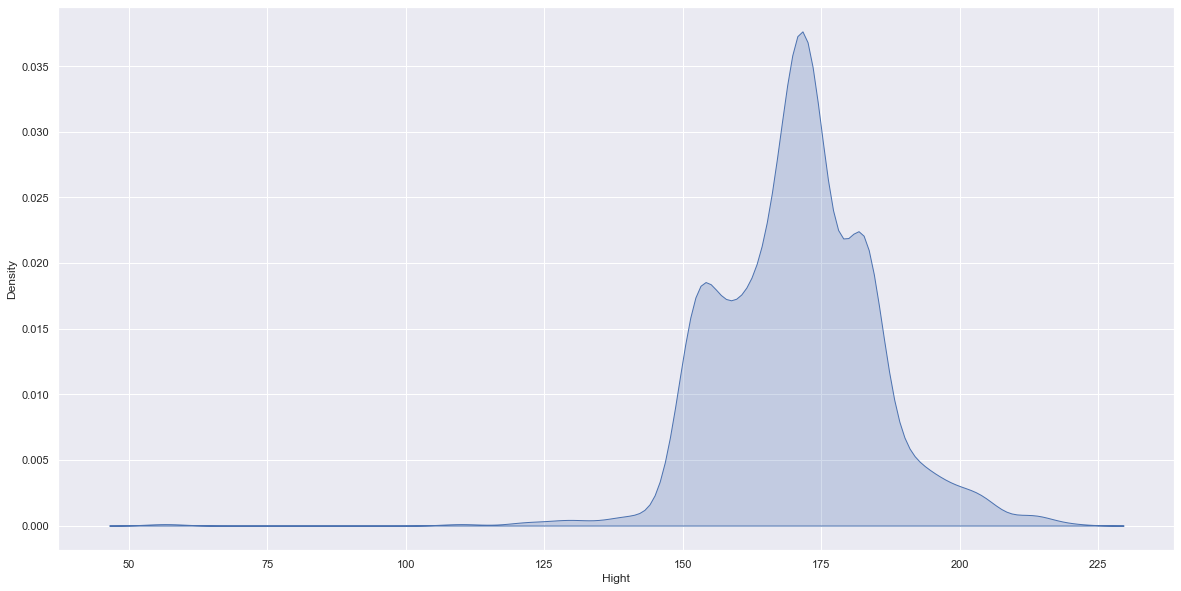

In [27]:
sns.kdeplot(data["Hight"], fill=True)

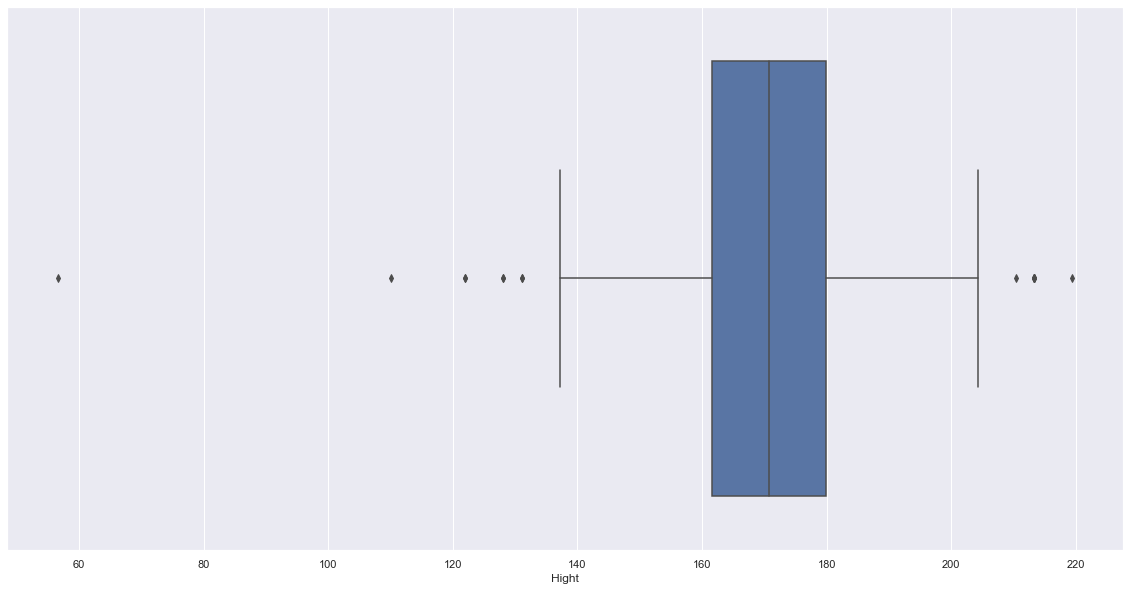

In [28]:
sns.boxplot(data["Hight"])

#### KDE distribution and boxplot for Weight

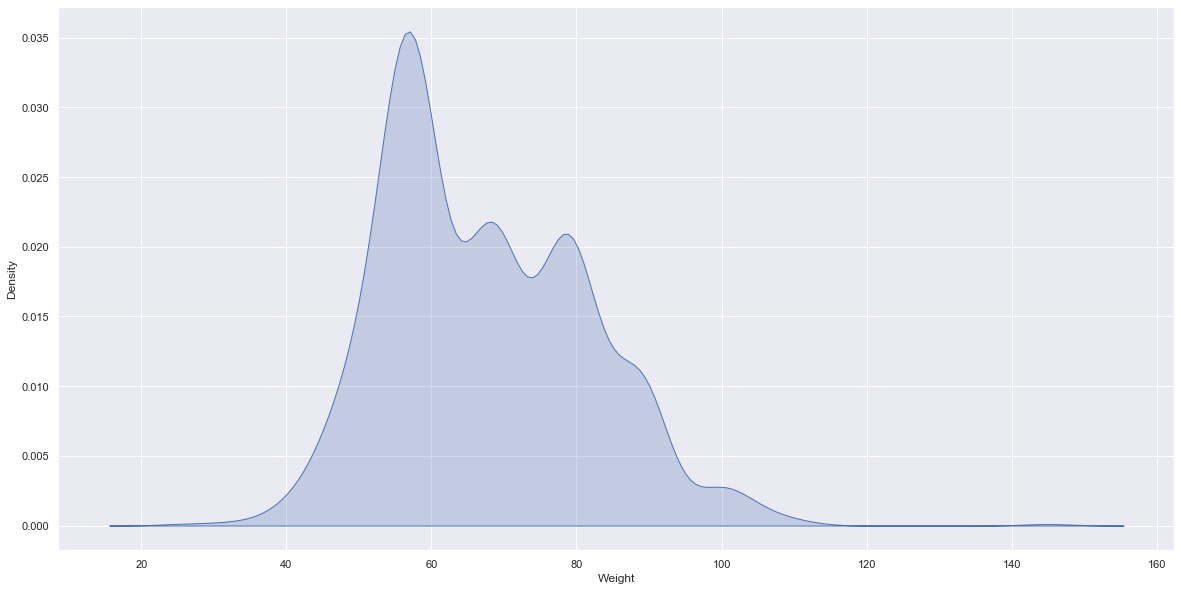

In [29]:
sns.kdeplot(data["Weight"], fill=True)

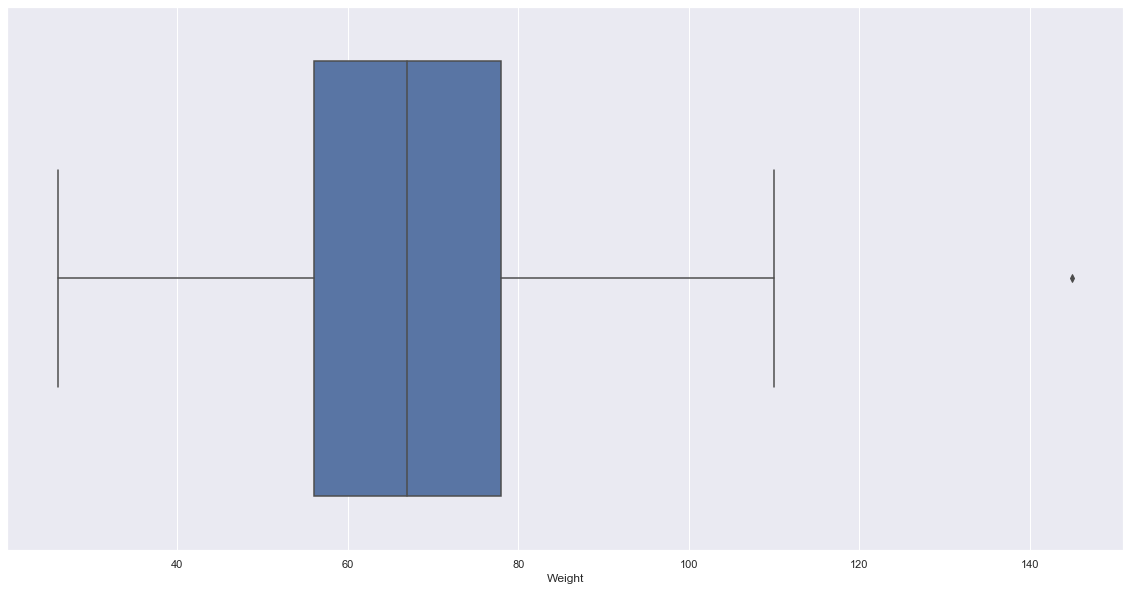

In [30]:
sns.boxplot(data["Weight"])

#### Plot between Hight and Weight

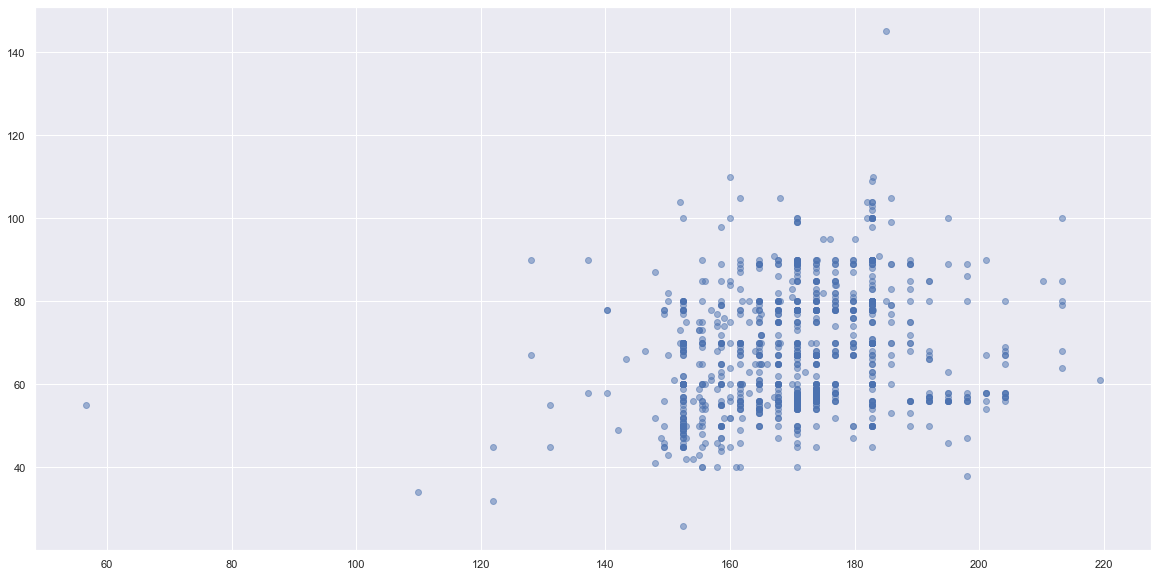

In [31]:
plt.scatter(data["Hight"], data["Weight"], alpha=0.5)

#### Histograms

Text(0.5, 0, 'Age')

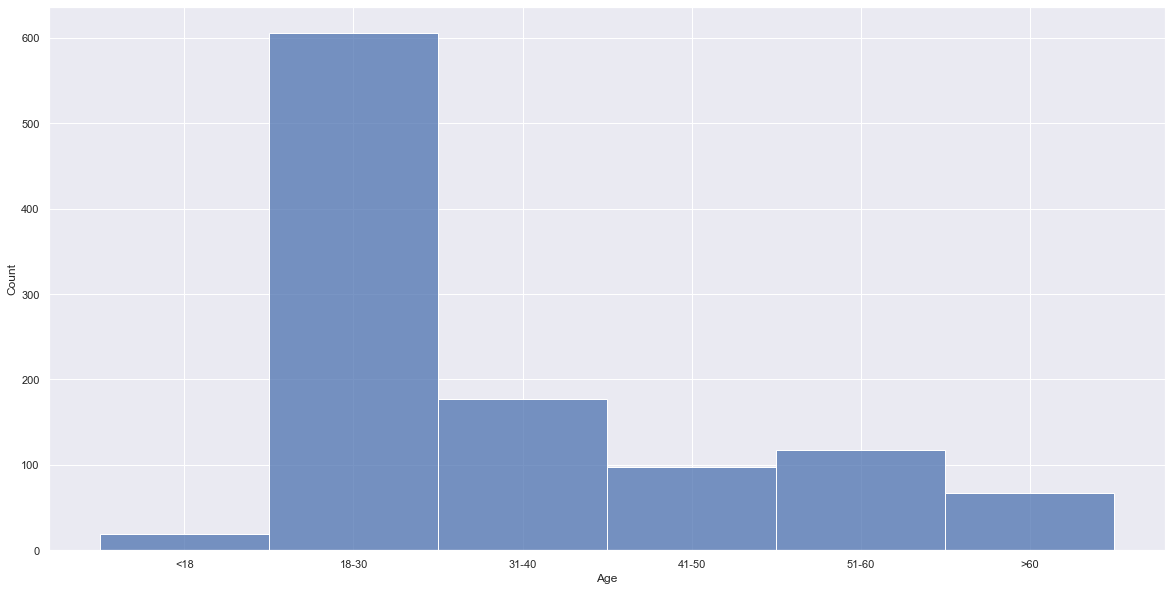

In [32]:
t = pd.Categorical(data['Age'], ['<18','18-30','31-40','41-50','51-60','>60'])
sns.histplot(t)
plt.xlabel("Age")

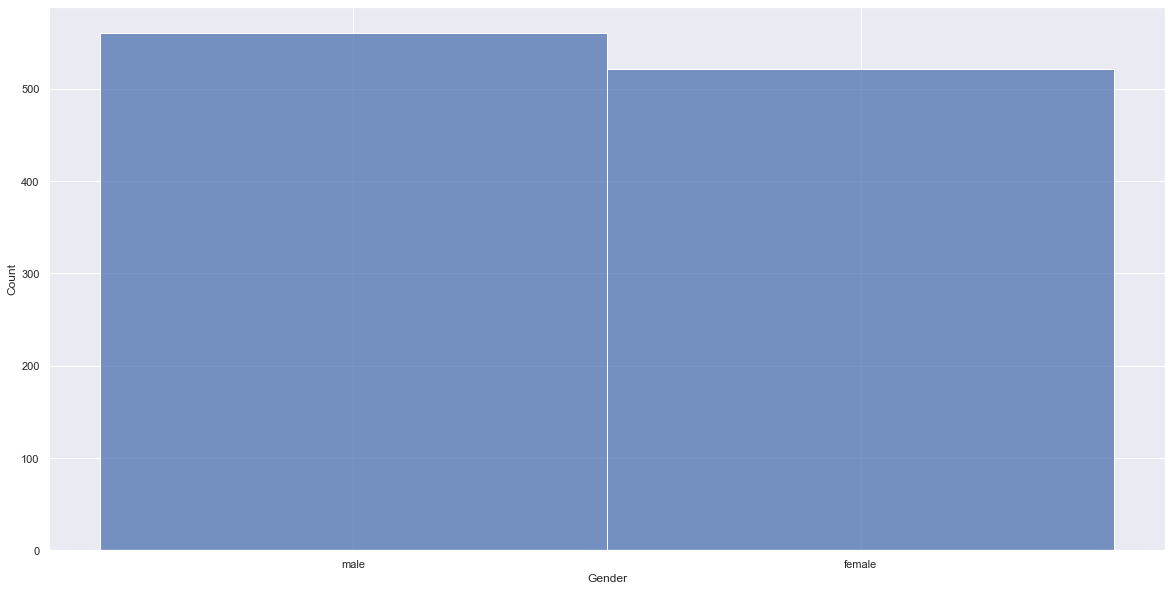

In [33]:
sns.histplot(data, x="Gender")

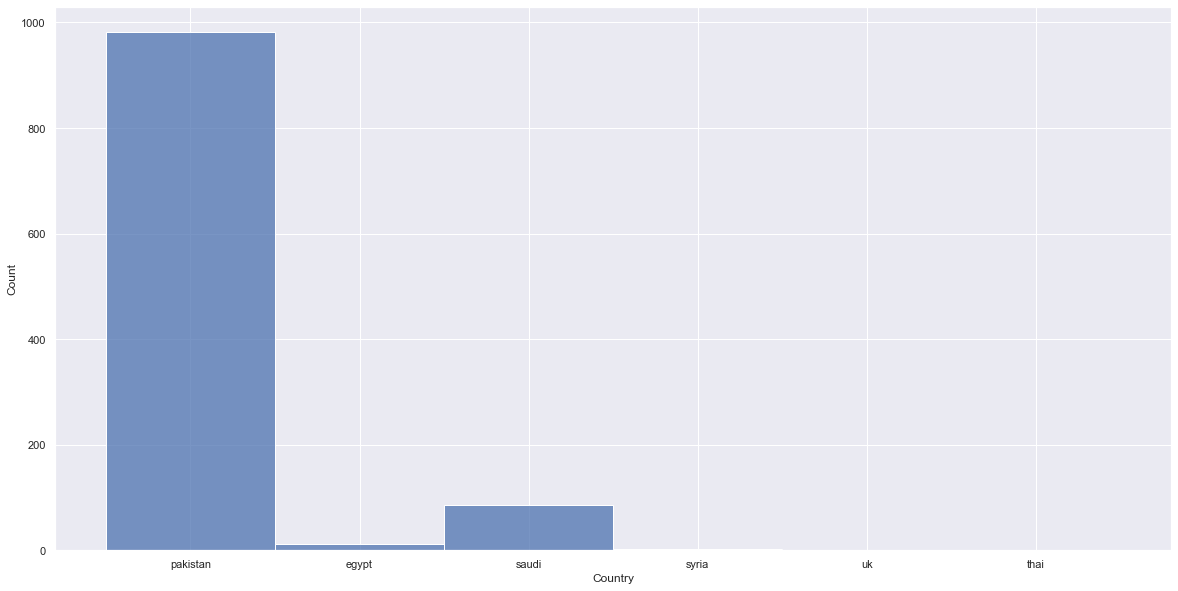

In [34]:
sns.histplot(data, x="Country")

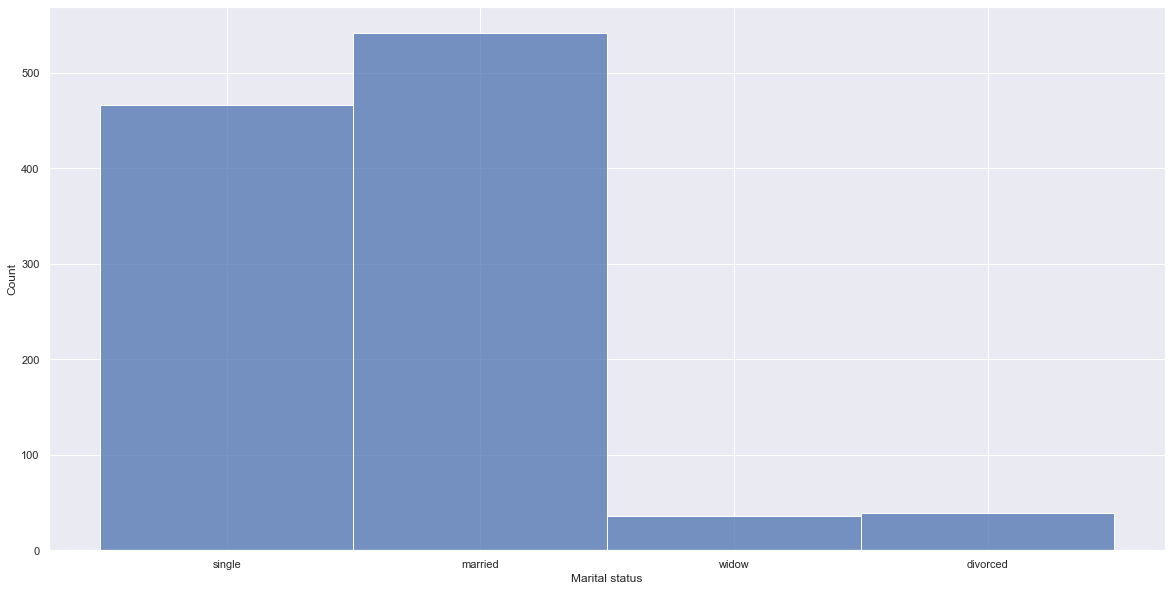

In [35]:
sns.histplot(data, x="Marital status")

Text(0.5, 0, 'Skin color')

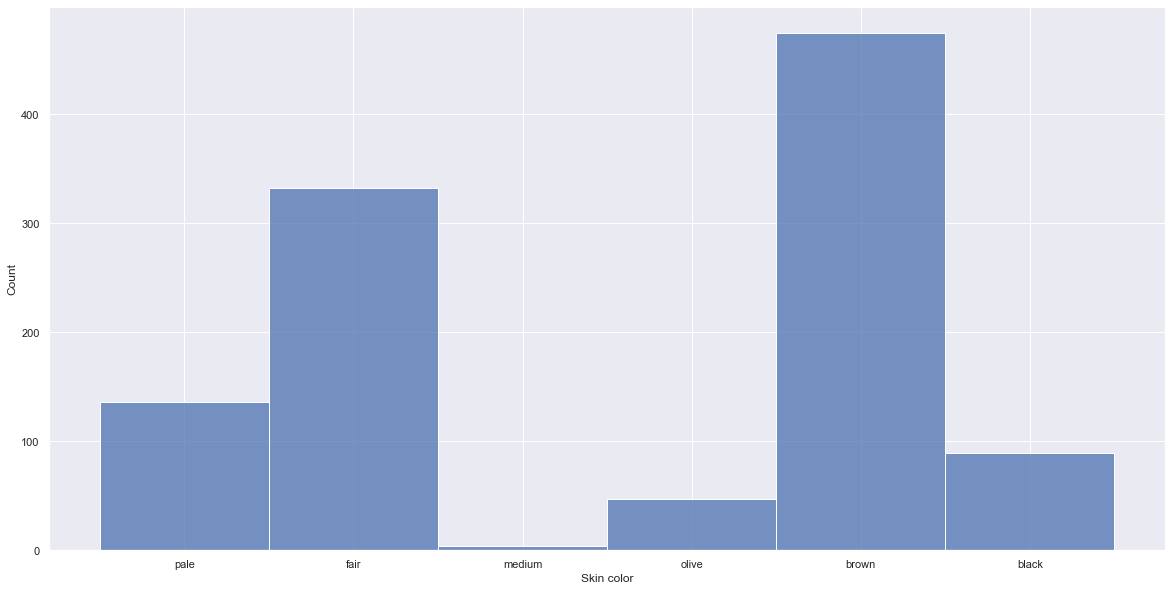

In [36]:
t = pd.Categorical(data['Skin color'], ['pale','fair','medium','olive','brown','black'])
sns.histplot(t)
plt.xlabel("Skin color")

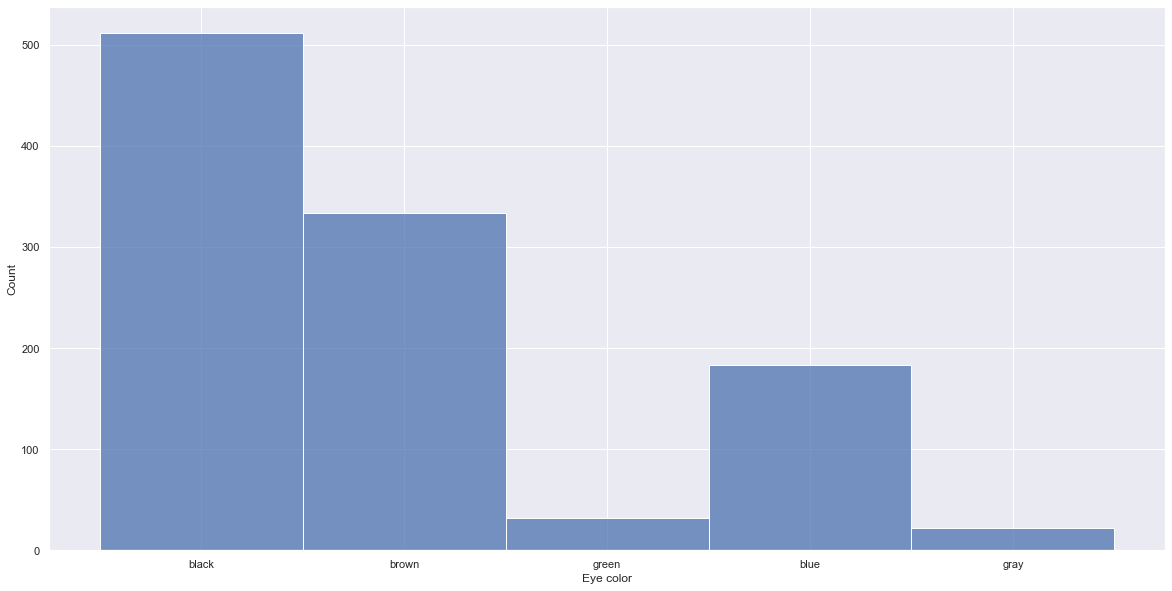

In [37]:
sns.histplot(data, x="Eye color")

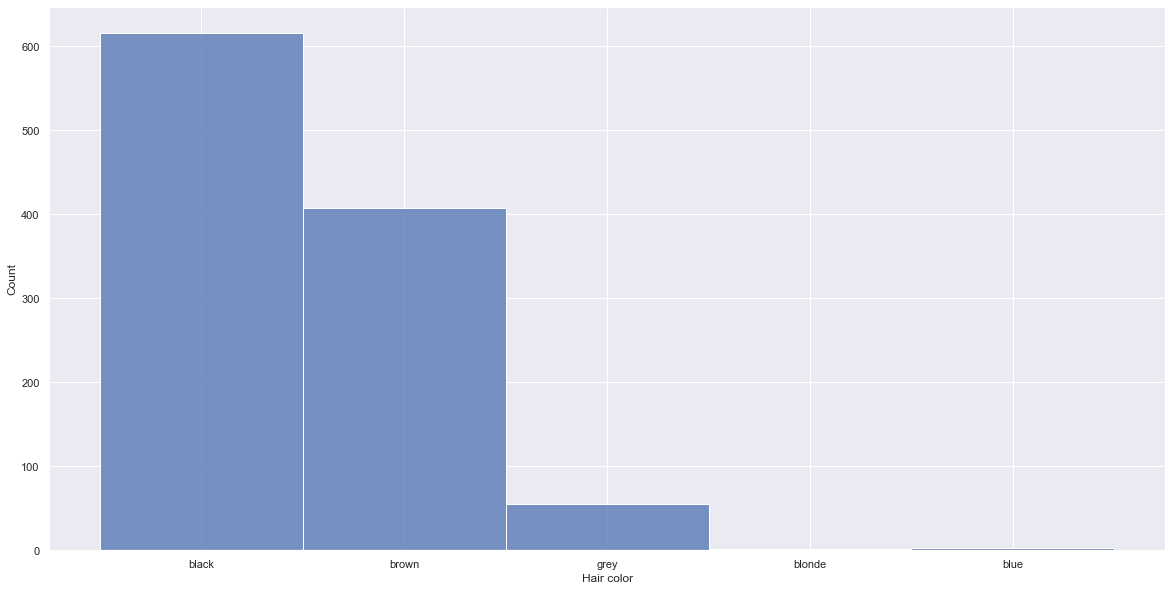

In [38]:
sns.histplot(data, x="Hair color")

Text(0.5, 0, 'Age')

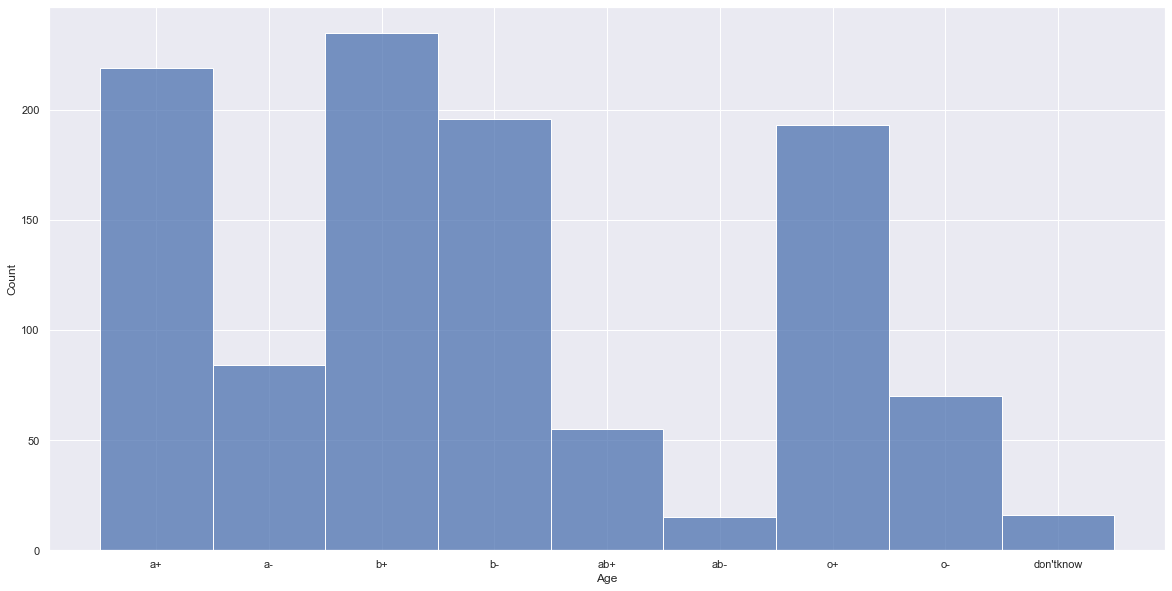

In [39]:
t = pd.Categorical(data['Blood Type'], ['a+','a-','b+','b-','ab+','ab-','o+','o-',"don'tknow"])
sns.histplot(t)
plt.xlabel("Age")

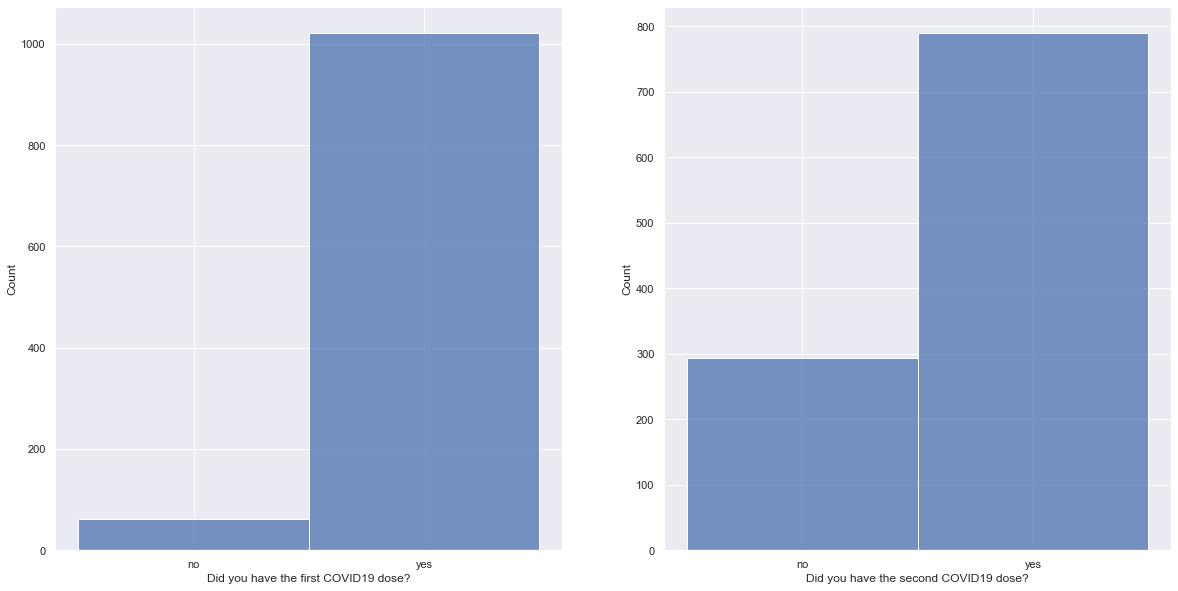

In [40]:
plt.subplot(1, 2, 1)
sns.histplot(data, x="Did you have the first COVID19 dose?")
plt.subplot(1, 2, 2)
sns.histplot(data, x="Did you have the second COVID19 dose?")

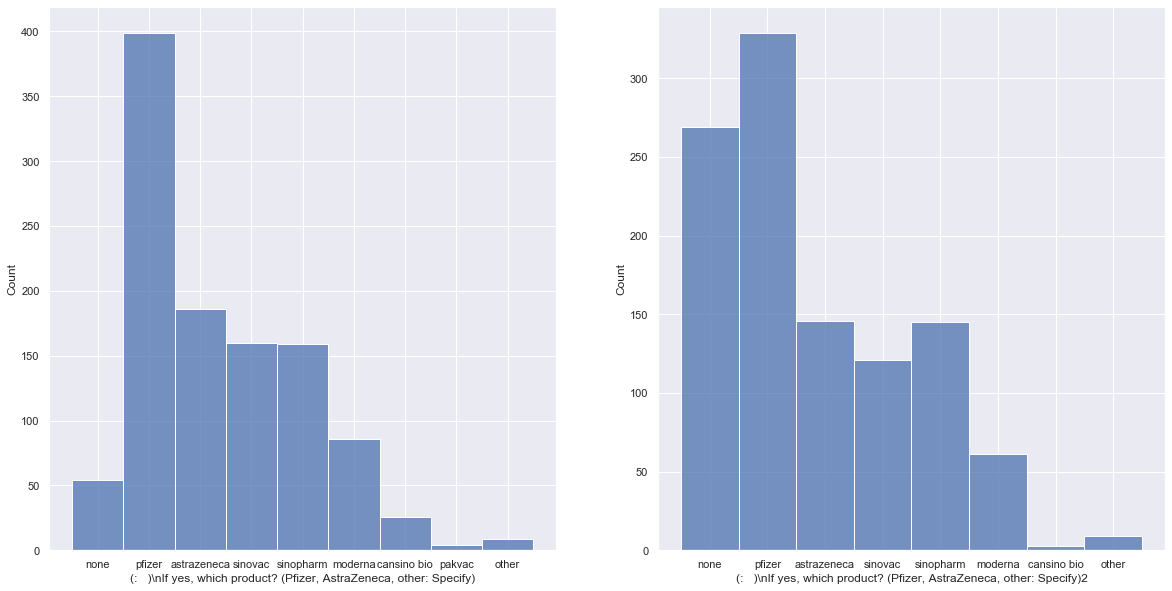

In [41]:
plt.subplot(1, 2, 1)
sns.histplot(data, x=r"(:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)")
plt.subplot(1, 2, 2)
sns.histplot(data, x=r"(:   )\nIf yes, which product? (Pfizer, AstraZeneca, other: Specify)2")

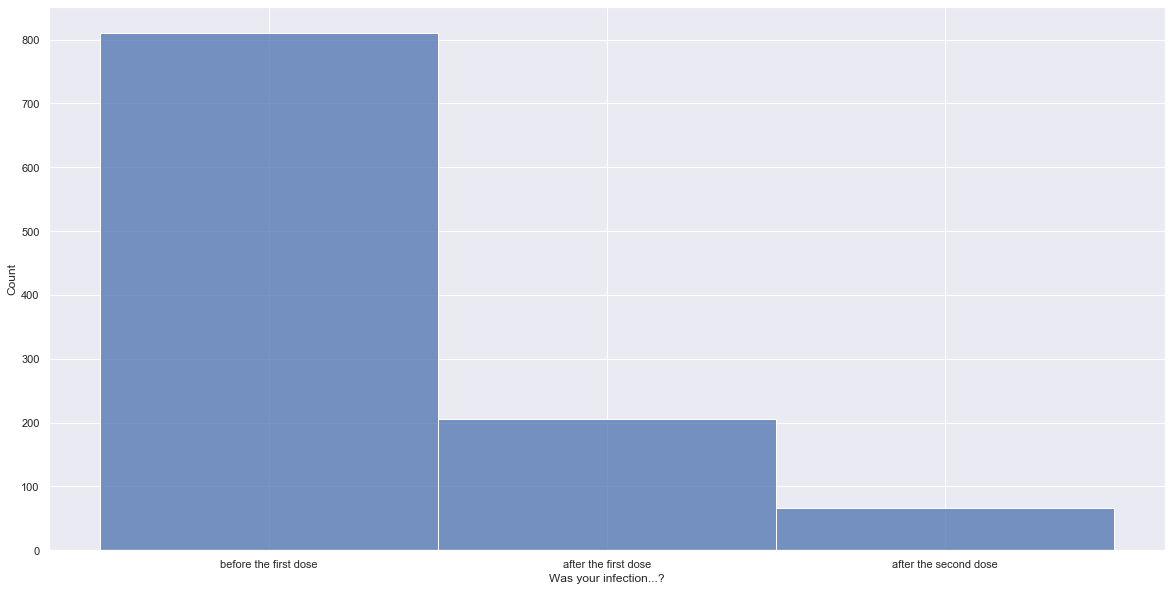

In [42]:
sns.histplot(data, x="Was your infection...?")

#### Lineplot of percentage of people suffering from symptoms 

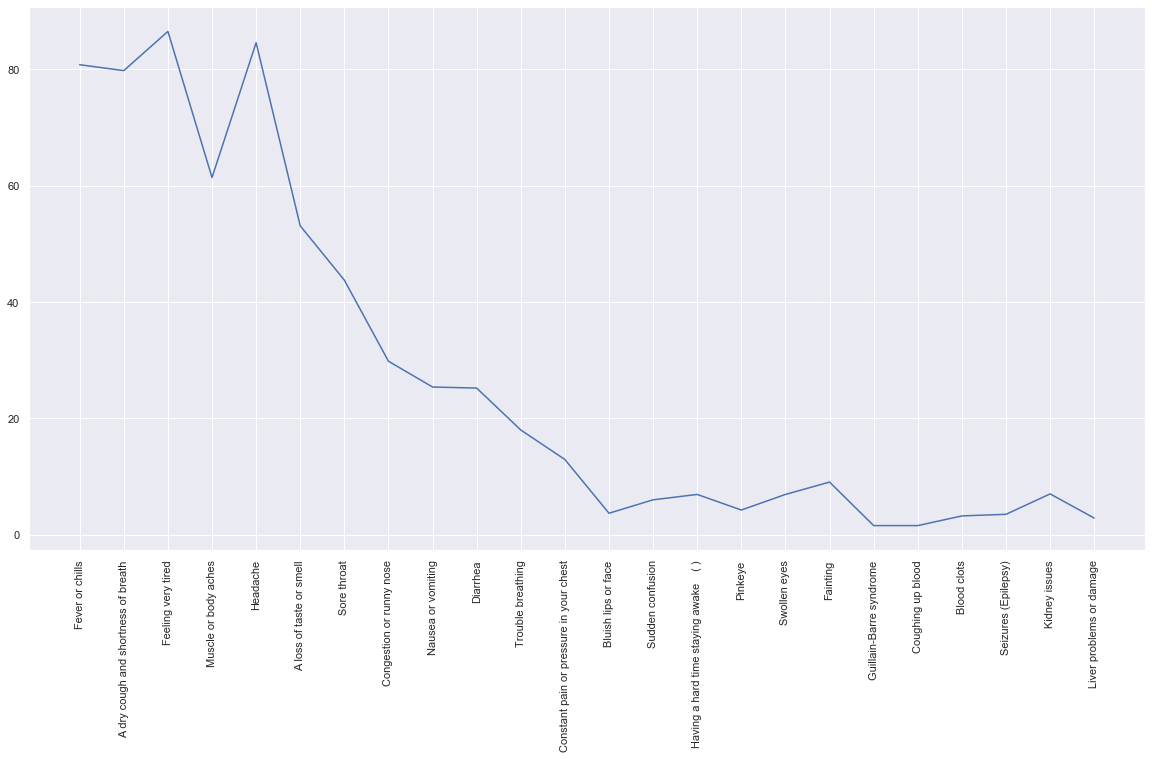

In [43]:
plt.plot(100*diseases.sum()/diseases.shape[0])
t=plt.xticks(rotation=90)

## Feature Engineering and Preprocessing for ML Model

Although the data is completely clean, but it is still not ready to be fed in ML Model.

Convert the columns having only yes/no or male/female to 1/0.

In [44]:
binary = [4, 11, 13, 14, 15, 16, 18, 23]
for i in binary:
    data[data.columns[i]]= (data[data.columns[i]] == "yes").astype(int)
data[data.columns[1]]= (data[data.columns[1]] == "male").astype(int)

There are 4 ansewrs for 'Do you suffer from blood pressure?':

1. no
2. yes, increase and decrease  -
3. yes, decrease  -
4. yes, increase  -

So, we can introduce 2 columns for increasing and decreasing blood pressure having binary values to answer the question.

In [45]:
increase = list()
decrease = list()
for i in range(data.shape[0]):
    if data[data.columns[12]].iloc[i] == "no":
        increase.append(0)
        decrease.append(0)
    elif data[data.columns[12]].iloc[i] == "yes, increase and decrease  -":
        increase.append(1)
        decrease.append(1)
    elif data[data.columns[12]].iloc[i] == "yes, decrease  -":
        increase.append(0)
        decrease.append(1)
    elif data[data.columns[12]].iloc[i] == "yes, increase  -":
        increase.append(1)
        decrease.append(0)

data.drop(data.columns[12], axis=1, inplace=True)
data["Does your blood pressure increase?"] = increase
data["Does your blood pressure decrease?"] = decrease

Normalize and standardize the numerical columns.

In [46]:
data[['Hight','Weight']] = StandardScaler().fit_transform(data[['Hight','Weight']])

One-Hot Encode the categorical columns.

In [47]:
cat = [0, 2, 3, 7, 8, 9, 10, 16, 18, 19, 20, 21]
categorical = pd.DataFrame()
for n,i in enumerate(cat):
    categorical[data.columns[i-n]] = data[data.columns[i-n]]
    data.drop(data.columns[i-n], axis=1, inplace=True)
categorical = pd.get_dummies(categorical, sparse=True)

Adjust datatypes, combine all the input data togather, then split the train and test data set.

In [48]:
categorical = categorical.astype(int)
diseases = diseases.astype(int)

x = pd.concat([data, categorical], axis=1)
y = diseases

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=52)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=52)
i=1;
for train_ix, test_ix in cv.split(x):
    if i==27:
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        break
    i+=1

Now train and evaluate ML classification models.

## Machine Learning

#### Logistic Regression
Logistic regression is a fundamental classification technique. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

<BarContainer object of 24 artists>

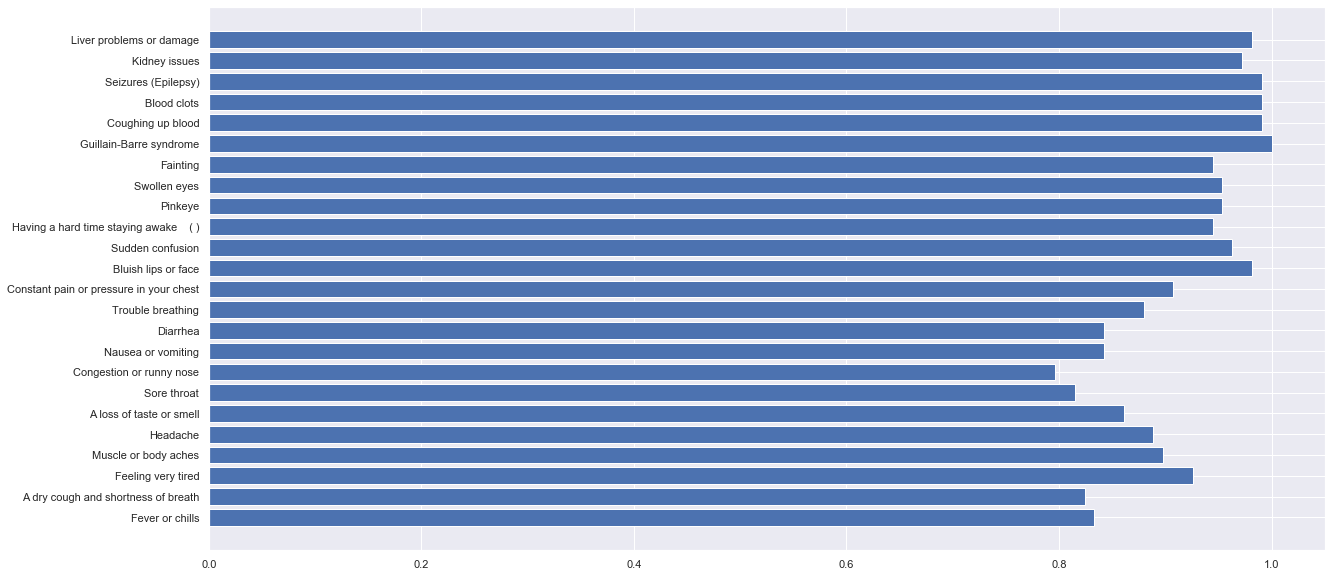

In [49]:
from sklearn.linear_model import LogisticRegression
logistic_regression = list()
for i in y_train.columns:
    model = LogisticRegression()
    model.fit(x_train, y_train[i])
    logistic_regression.append(model.score(x_test,y_test[i]))
plt.barh(width=logistic_regression, y=y_test.columns)

#### Naive Bayes
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities. In Bayesian classification, we're interested in finding the probability of a label given some observed features.

<BarContainer object of 24 artists>

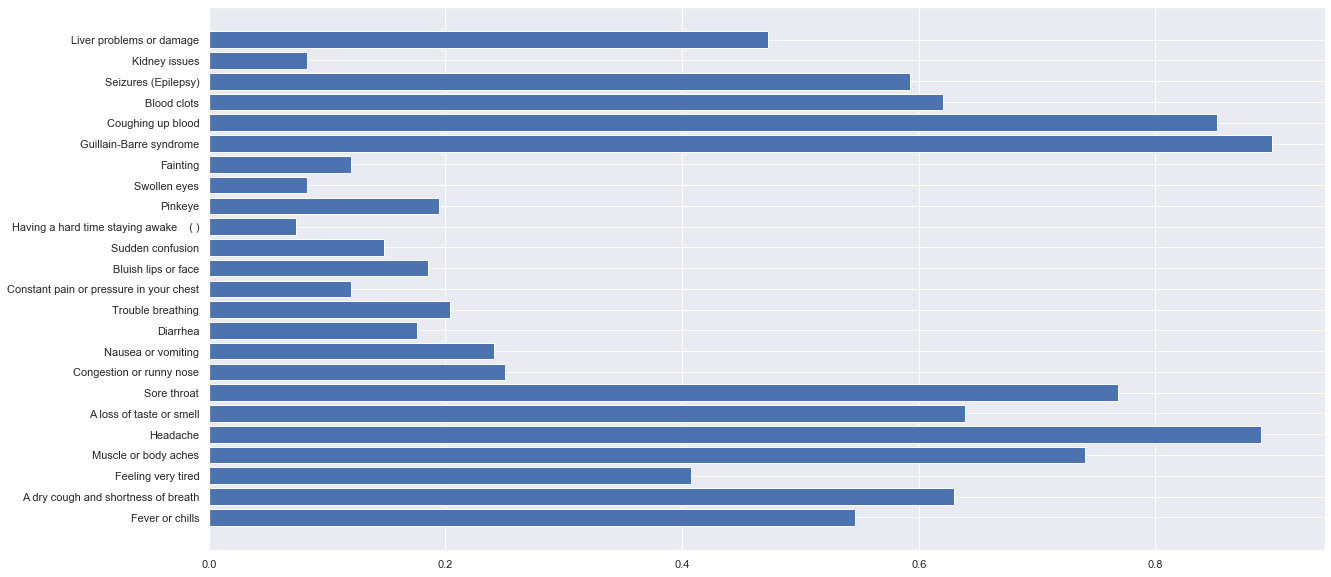

In [50]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = list()
for i in y_train.columns:
    model = GaussianNB()
    model.fit(x_train, y_train[i])
    naive_bayes.append(model.score(x_test,y_test[i]))
plt.barh(width=naive_bayes, y=y_test.columns)

#### k-Nearest Neighbors
The k-Nearest Neighbors algorithm or KNN for short is a very simple technique. The entire training dataset is stored. When a prediction is required, the k-most similar records to a new record from the training dataset are then located. From these neighbors, a summarized prediction is made. Once the neighbors are discovered, the summary prediction can be made by returning the most common outcome or taking the average. As such, KNN can be used for classification or regression problems.

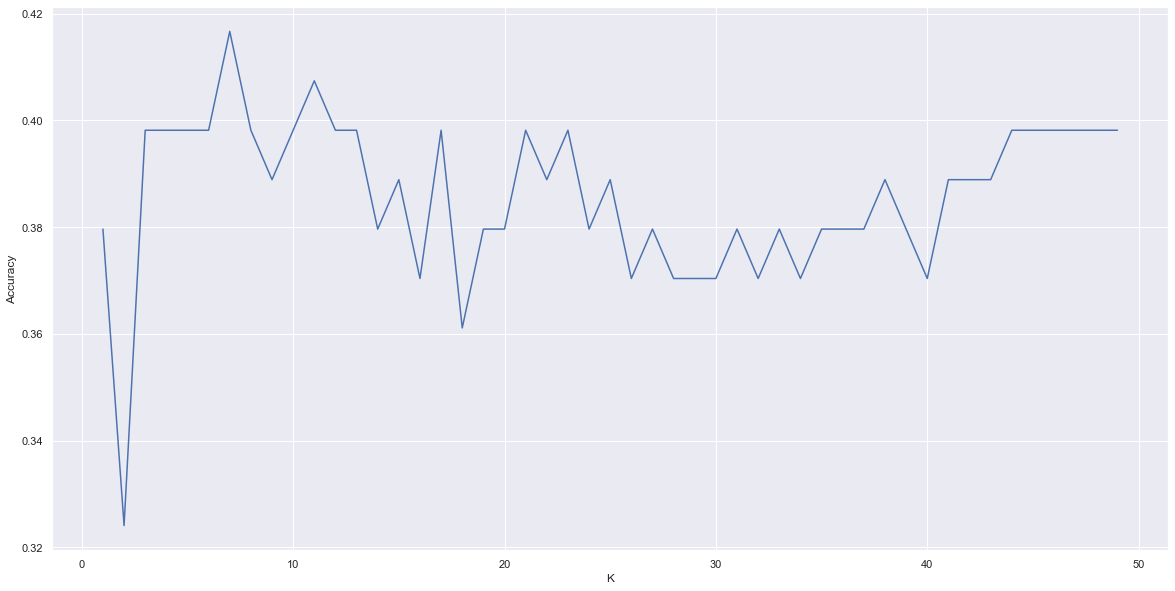

In [51]:
from sklearn.neighbors import KNeighborsClassifier
s=list()
for i in range(49):
    model = KNeighborsClassifier(n_neighbors=i+1)
    model.fit(x_train, y_train)
    s.append(model.score(x_test, y_test))
plt.plot(range(1,50),s)
plt.xlabel('K')
plt.ylabel('Accuracy')

model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

This plot shows the overall accuracy of the KNN for k = 1-50. As it is found that the maximum accuracy is acchieved when k = 7.

<BarContainer object of 24 artists>

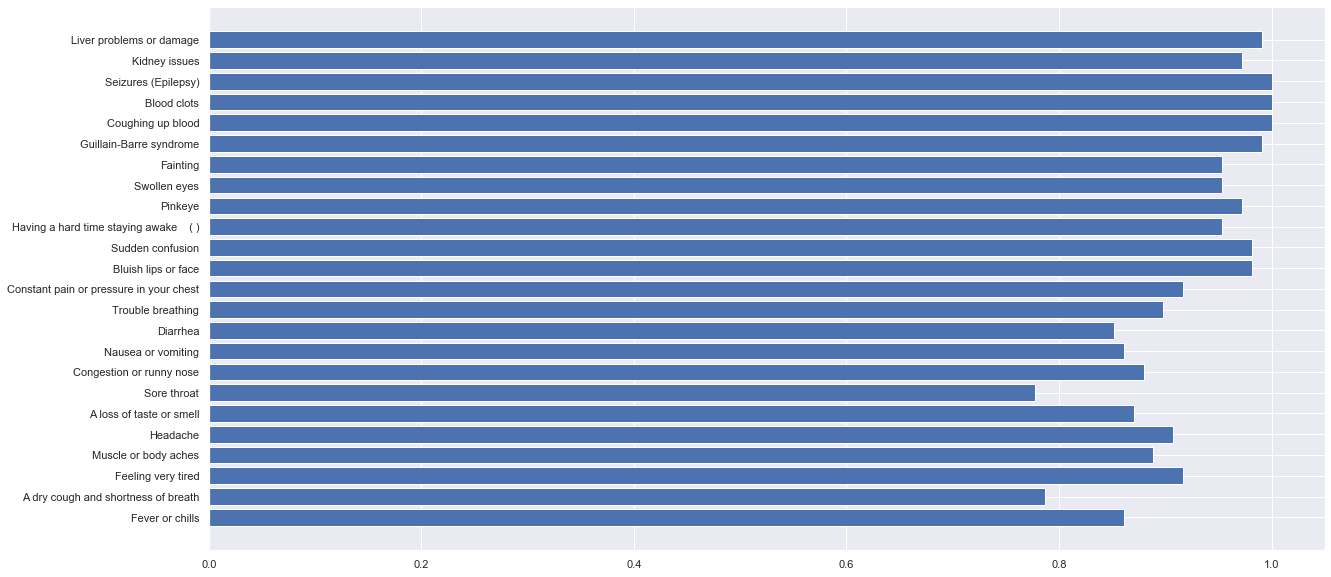

In [52]:
predictions = pd.DataFrame(predictions, columns=y_test.columns)
KNN=list()
for j in range(y_test.shape[1]):
    t=list()
    for i in range(y_test.shape[0]):
        t.append(predictions[predictions.columns[j]].iloc[i]==y_test[y_test.columns[j]].iloc[i])
    KNN.append(sum(t)/y_test.shape[0])
plt.barh(width=KNN, y=y_test.columns)

#### Support Vector Machines
SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition. The classifier separates data points using a hyperplane with the largest amount of margin. SVM finds an optimal hyperplane which helps in classifying new data points. 

<BarContainer object of 24 artists>

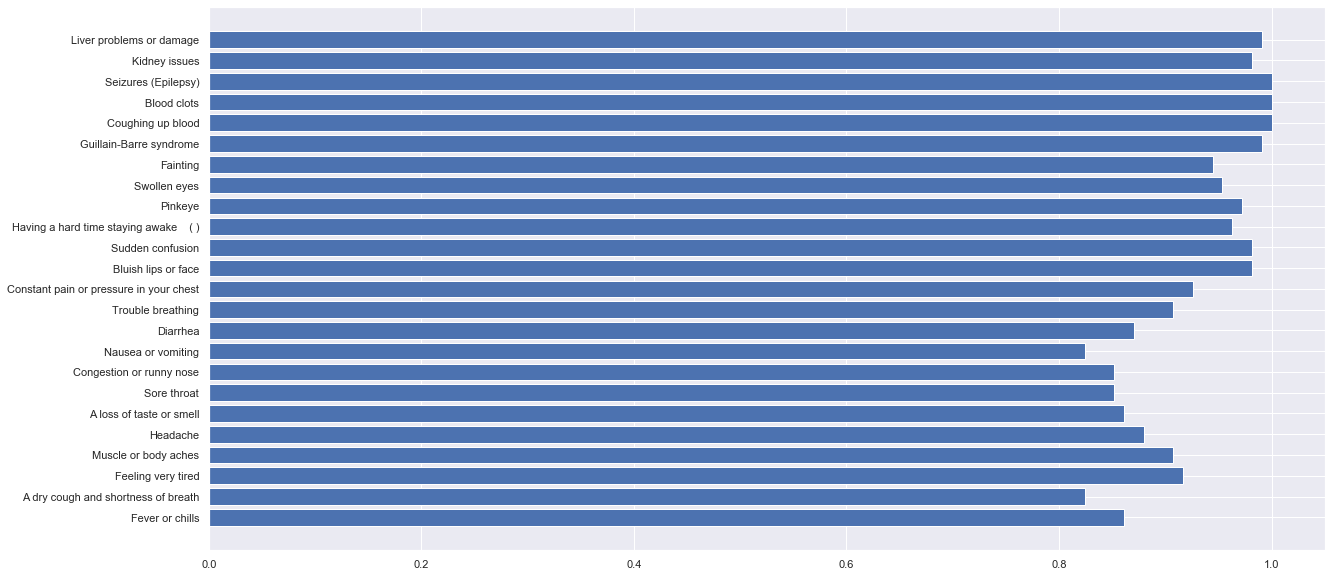

In [53]:
from sklearn import svm
SVM = list()
for i in y_train.columns:
    model = svm.SVC()
    model.fit(x_train, y_train[i])
    SVM.append(model.score(x_test,y_test[i]))
plt.barh(width=SVM, y=y_test.columns)

#### Decision Tree
A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<BarContainer object of 24 artists>

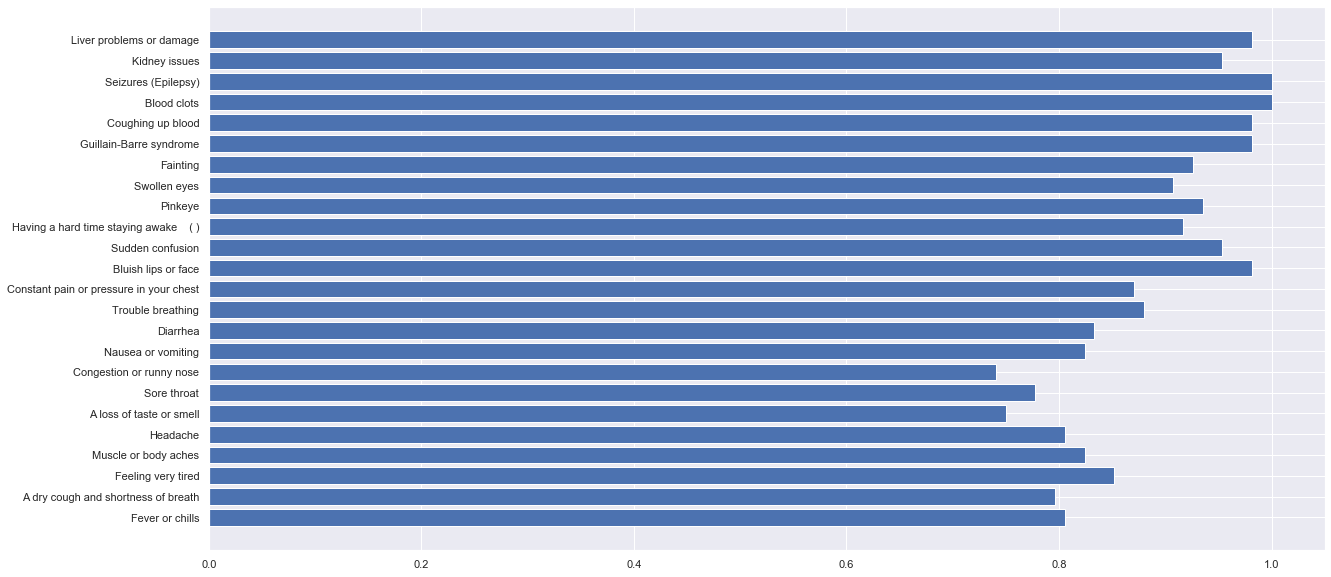

In [54]:
from sklearn import tree
decision_tree = list()
for i in y_train.columns:
    model = tree.DecisionTreeClassifier(max_depth=100)
    model.fit(x_train, y_train[i])
    decision_tree.append(model.score(x_test,y_test[i]))
plt.barh(width=decision_tree, y=y_test.columns)

#### Random Forest
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

<BarContainer object of 24 artists>

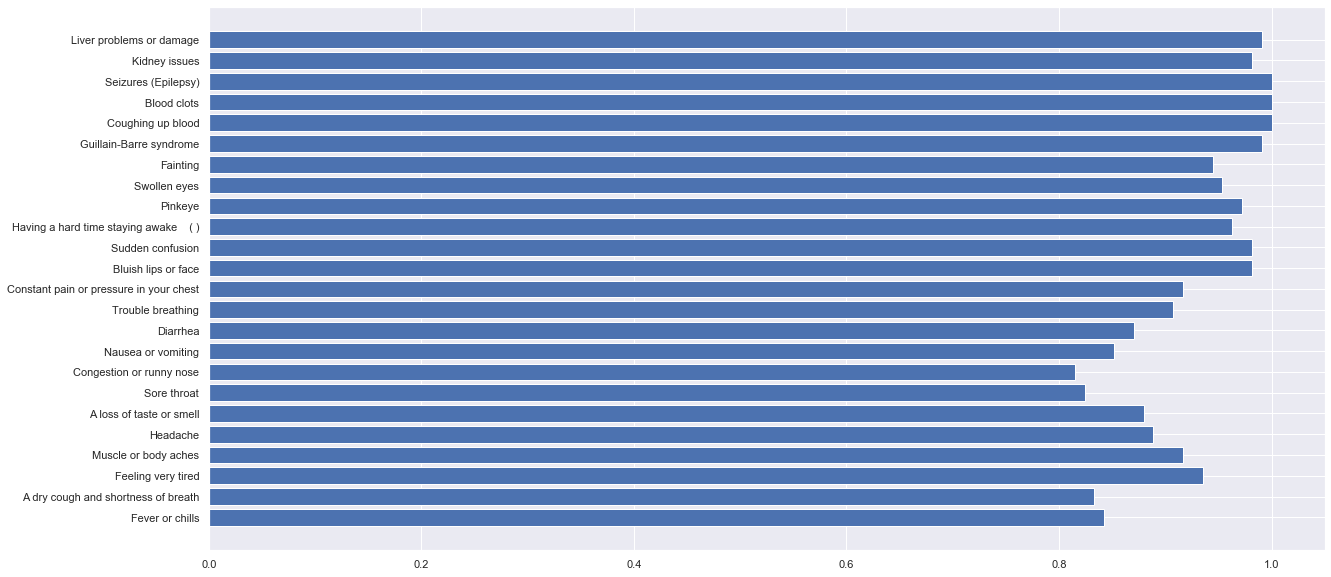

In [55]:
from sklearn.ensemble import RandomForestClassifier
random_forest = list()
for i in y_train.columns:
    model = RandomForestClassifier(max_depth=10, random_state=0)
    model.fit(x_train, y_train[i])
    random_forest.append(model.score(x_test,y_test[i]))
plt.barh(width=random_forest, y=y_test.columns)

#### Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets, and have recently been used to win many Kaggle data science competitions.

<BarContainer object of 24 artists>

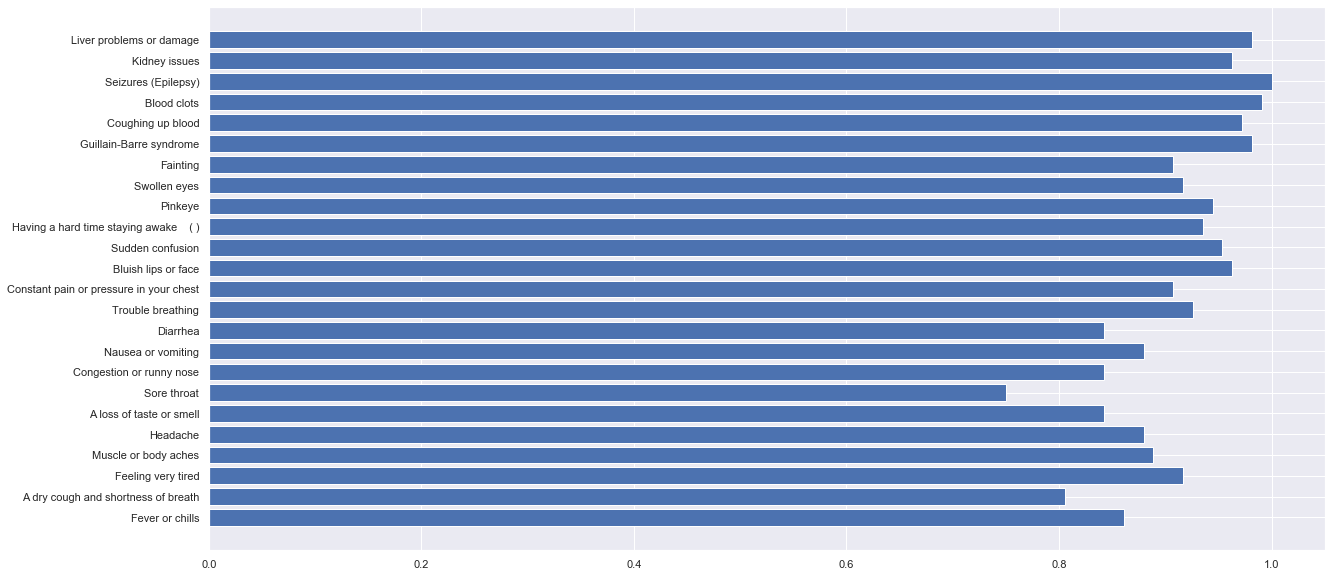

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = list()
for i in y_train.columns:
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=10, random_state=0)
    model.fit(x_train, y_train[i])
    gradient_boost.append(model.score(x_test,y_test[i]))
plt.barh(width=gradient_boost, y=y_test.columns)

#### Neural Network
Neural Network consists of a larger set of neurons, which are termed units arranged in layers. In simple words, Neural Network is designed to perform a more complex task where Machine Learning algorithms do not find their use and fail to achieve the required performance. Neural Networks are used to perform many complex tasks including Image Classification, Object Detection, Face Identification, Text Summarization, speech recognition, and the list is endless. A neural network has many layers and each layer performs a specific function and complex the network. The more the layers are more performance is received. That’s why the neural network is also called a multi-layer perceptron.

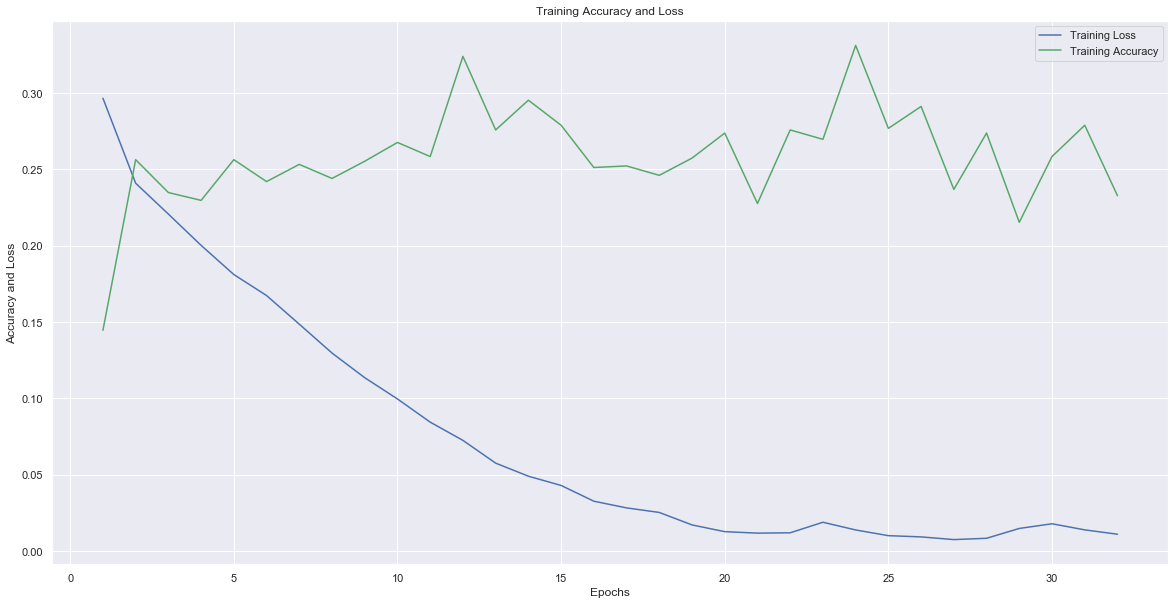

In [57]:
from keras.models import Sequential
from keras.layers import Dense

def get_model(n_inputs, n_outputs):

    return model

n_inputs, n_outputs = x.shape[1], y.shape[1]

        
model = Sequential()
model.add(Dense(2048, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    
h = model.fit(x_train, y_train, verbose=0, epochs=32, batch_size=10)
yhat = model.predict(x_test)
yhat = yhat.round()

loss_train = h.history['loss']
acc_train = h.history['accuracy']
epochs = range(1,33)
plt.plot(epochs, loss_train, 'b', label='Training Loss')
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.title('Training Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend()

<BarContainer object of 24 artists>

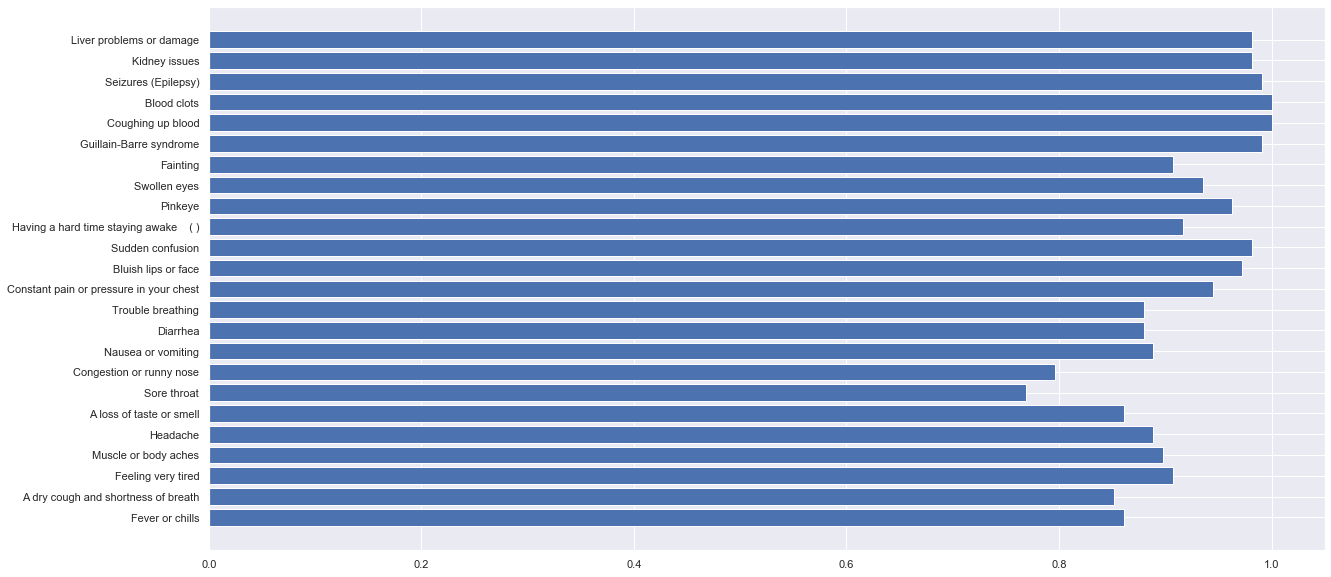

In [58]:
predictions = pd.DataFrame(yhat, columns=y_test.columns)
ANN=list()
for j in range(y_test.shape[1]):
    t=list()
    for i in range(y_test.shape[0]):
        t.append(predictions[predictions.columns[j]].iloc[i]==y_test[y_test.columns[j]].iloc[i])
    ANN.append(sum(t)/y_test.shape[0])
plt.barh(width=ANN, y=y_test.columns)

# Comparing ML Algorithms

Note down the performance of all the algorithms for each symptom in form of a table.

In [59]:
pred = pd.DataFrame([logistic_regression,naive_bayes,KNN,SVM,decision_tree,random_forest,gradient_boost,ANN],
                    columns=y_test.columns,
                    index=["logistic_regression","naive_bayes","KNN","SVM","decision_tree","random_forest","gradient_boost","ANN"])
pred

,Fever or chills,A dry cough and shortness of breath,Feeling very tired,Muscle or body aches,Headache,A loss of taste or smell,Sore throat,Congestion or runny nose,Nausea or vomiting,Diarrhea,...,Having a hard time staying awake ( ),Pinkeye,Swollen eyes,Fainting,Guillain-Barre syndrome,Coughing up blood,Blood clots,Seizures (Epilepsy),Kidney issues,Liver problems or damage
logistic_regression,0.833333,0.824074,0.925926,0.898148,0.888889,0.861111,0.814815,0.796296,0.842593,0.842593,...,0.944444,0.953704,0.953704,0.944444,1.000000,0.990741,0.990741,0.990741,0.972222,0.981481
naive_bayes,0.546296,0.629630,0.407407,0.740741,0.888889,0.638889,0.768519,0.250000,0.240741,0.175926,...,0.074074,0.194444,0.083333,0.120370,0.898148,0.851852,0.620370,0.592593,0.083333,0.472222
KNN,0.861111,0.787037,0.916667,0.888889,0.907407,0.870370,0.777778,0.879630,0.861111,0.851852,...,0.953704,0.972222,0.953704,0.953704,0.990741,1.000000,1.000000,1.000000,0.972222,0.990741
SVM,0.861111,0.824074,0.916667,0.907407,0.879630,0.861111,0.851852,0.851852,0.824074,0.870370,...,0.962963,0.972222,0.953704,0.944444,0.990741,1.000000,1.000000,1.000000,0.981481,0.990741
decision_tree,0.805556,0.796296,0.851852,0.824074,0.805556,0.750000,0.777778,0.740741,0.824074,0.833333,...,0.916667,0.935185,0.907407,0.925926,0.981481,0.981481,1.000000,1.000000,0.953704,0.981481
random_forest,0.842593,0.833333,0.935185,0.916667,0.888889,0.879630,0.824074,0.814815,0.851852,0.870370,...,0.962963,0.972222,0.953704,0.944444,0.990741,1.000000,1.000000,1.000000,0.981481,0.990741
gradient_boost,0.861111,0.805556,0.916667,0.888889,0.879630,0.842593,0.750000,0.842593,0.879630,0.842593,...,0.935185,0.944444,0.916667,0.907407,0.981481,0.972222,0.990741,1.000000,0.962963,0.981481
ANN,0.861111,0.851852,0.907407,0.898148,0.888889,0.861111,0.768519,0.796296,0.888889,0.879630,...,0.916667,0.962963,0.935185,0.907407,0.990741,1.000000,1.000000,0.990741,0.981481,0.981481


Note: Due to stochastic behaviour of ANN the accuracy of ANN keeps changing. The following conclusion might differ from the above table.

From the above table we can extract the algorithms that yeild the highest accuracy for each symptom.

1. Fever or chills: **ANN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 0.870370
2. A dry cough and shortness of breath: **ANN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 0.851852
3. Feeling very tired: **ANN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; 0.944444
4. Muscle or body aches: **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; 0.916667
5. Headache: **KNN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; 0.907407
6. A loss of taste or smell: **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; 0.879630
7. Sore throat: **SVM**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; 0.851852
8. Congestion or runny nose: **KNN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; 0.879630
9. Nausea or vomiting: **ANN**, **gradient_boost**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; 0.879630
10. Diarrhea: **SVM**, **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 0.870370
11. Trouble breathing: **gradient_boost**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; 0.925926
12. Constant pain or pressure in your chest: **SVM**, **ANN**: &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; 0.925926
13. Bluish lips or face: **KNN**, **SVM**, **random_forest**, **logistic_regression**: &emsp; 0.981481
14. Sudden confusion: **KNN**, **SVM**, **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 0.981481
15. Having a hard time staying awake    ( ): **SVM**, **random_forest**: &emsp;&emsp;&emsp;&emsp; &emsp; 0.962963
16. Pinkeye: **KNN**, **SVM**, **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; 0.972222
17. Swollen eyes: **KNN**, **SVM**, **random_forest**, **logistic_regression**: &emsp;&emsp; &emsp; 0.953704
18. Fainting: **KNN**, **ANN**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; 0.953704
19. Guillain-Barre syndrome: **logistic_regression**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; 1.000000
20. Coughing up blood: **KNN**, **SVM**, **ANN**, **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 1.000000
21. Blood clots: **KNN**, **SVM**, **decision_tree**, **random_forest**: &emsp;&emsp;&emsp; &emsp; &emsp; &emsp; 1.000000
22. Seizures (Epilepsy): **KNN**, **SVM**, **ANN**, **random_forest**, **gradient_boost**: 1.000000
23. Kidney issues: **SVM**, **random_forest**: &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp; &emsp; 0.981481
24. Liver problems or damage: **KNN**, **SVM**, **ANN**, **random_forest**: &emsp;&emsp; &emsp; &emsp; 0.990741

Based on the above table, we can classify the algorithms into 3 categories:

1. Useless: **naive_bayes**, **decision_tree** (Doesn't have the highest accuracy in any symptom, therefore it is safe to ignore/remove these algorithms)
2. Not Important: **gradient_boost**, **SVM**, **logistic_regression** (Only one symptom for each of them where only they have the highest accuracy, therefore we will lose a little bit accuracy in 3 symptoms if we ignore/remove these algorithms)
1. Important: **naive_bayes**,**decision_tree** (Algorithms with most accuracy in majority of the symptoms, therefore it is not safe to ignore/remove these algorithms)

Compare the performance of every algorithm graphycally.

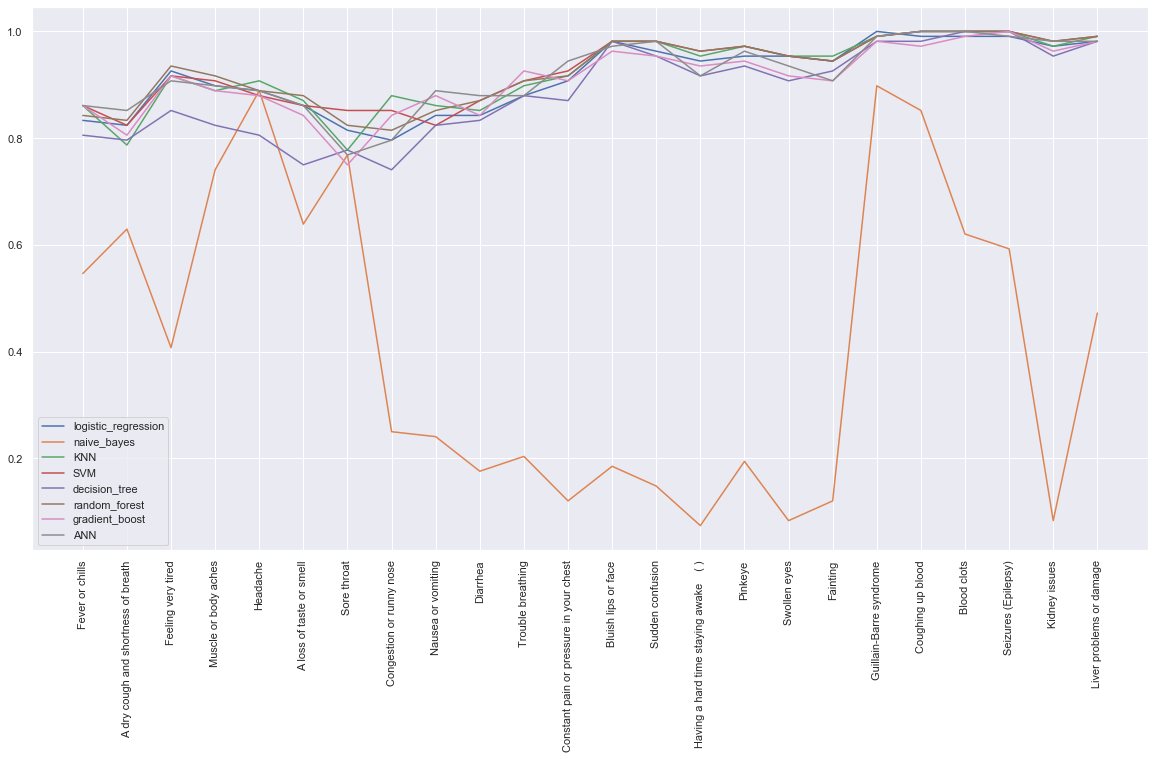

In [60]:
sns.lineplot(x=y_test.columns, y=logistic_regression)
sns.lineplot(x=y_test.columns, y=naive_bayes)
sns.lineplot(x=y_test.columns, y=KNN)
sns.lineplot(x=y_test.columns, y=SVM)
sns.lineplot(x=y_test.columns, y=decision_tree)
sns.lineplot(x=y_test.columns, y=random_forest)
sns.lineplot(x=y_test.columns, y=gradient_boost)
sns.lineplot(x=y_test.columns, y=ANN)

l=["logistic_regression","naive_bayes","KNN","SVM","decision_tree","random_forest","gradient_boost","ANN"]
plt.legend(l)
t=plt.xticks(rotation=90)

Now, remove the useless algorithms and compare again.

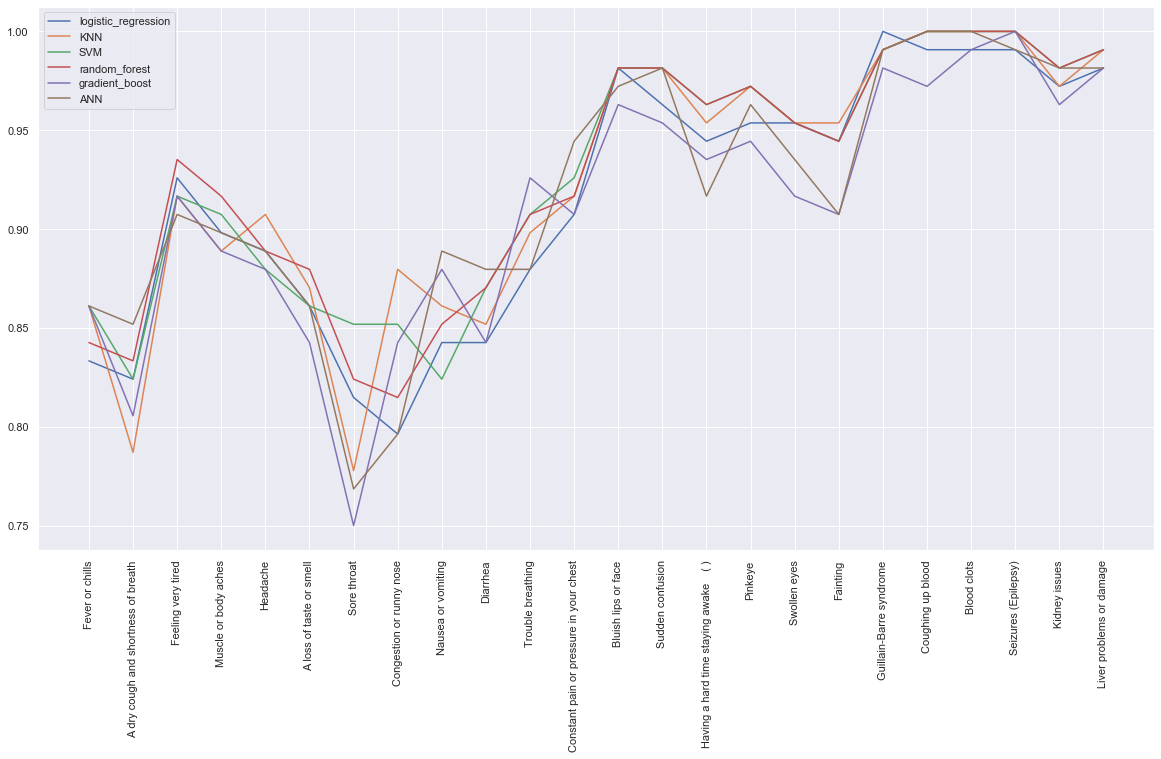

In [61]:
sns.lineplot(x=y_test.columns, y=logistic_regression)
sns.lineplot(x=y_test.columns, y=KNN)
sns.lineplot(x=y_test.columns, y=SVM)
sns.lineplot(x=y_test.columns, y=random_forest)
sns.lineplot(x=y_test.columns, y=gradient_boost)
sns.lineplot(x=y_test.columns, y=ANN)

l=["logistic_regression","KNN","SVM","random_forest","gradient_boost","ANN"]
plt.legend(l)
t=plt.xticks(rotation=90)

Now, only keep the important ones and ignore the rest.

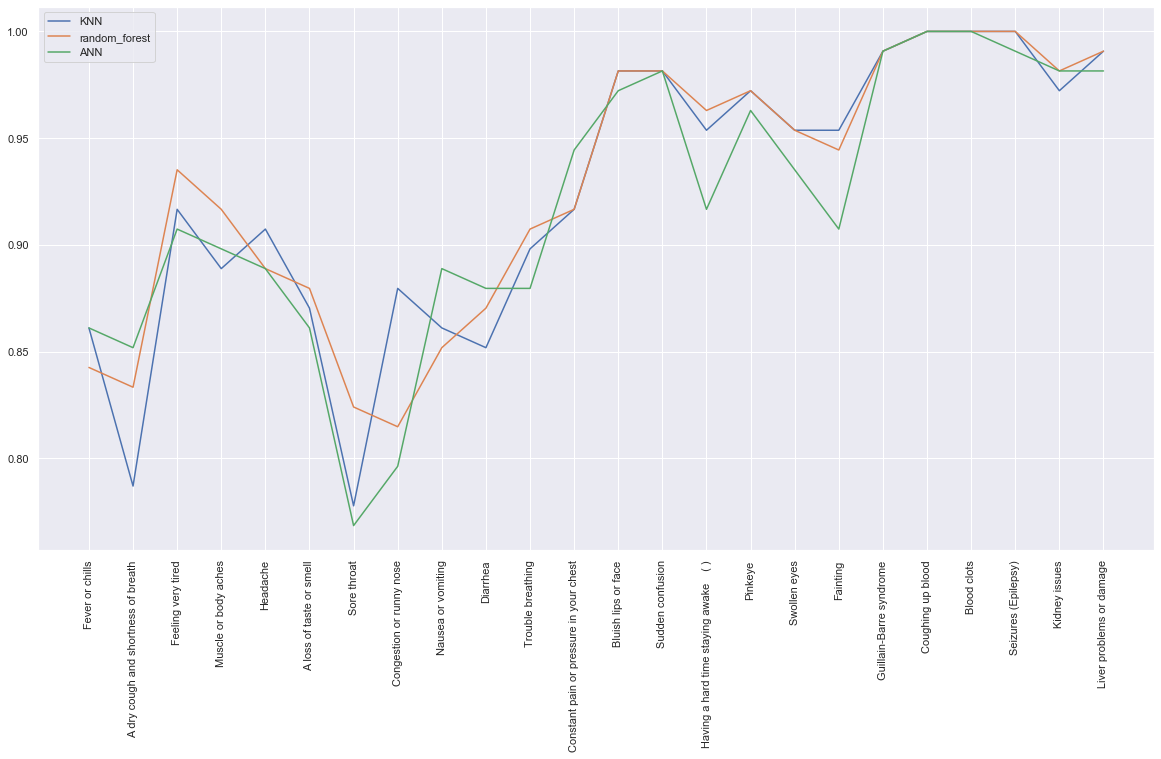

In [62]:
sns.lineplot(x=y_test.columns, y=KNN)
sns.lineplot(x=y_test.columns, y=random_forest)
sns.lineplot(x=y_test.columns, y=ANN)

l=["KNN","random_forest","ANN"]
plt.legend(l)
t=plt.xticks(rotation=90)

It is found that Random Forest is the only algorithm that never had accuracy less than 80%. Therefore, I think it is the best-suited algorithm for this problem.

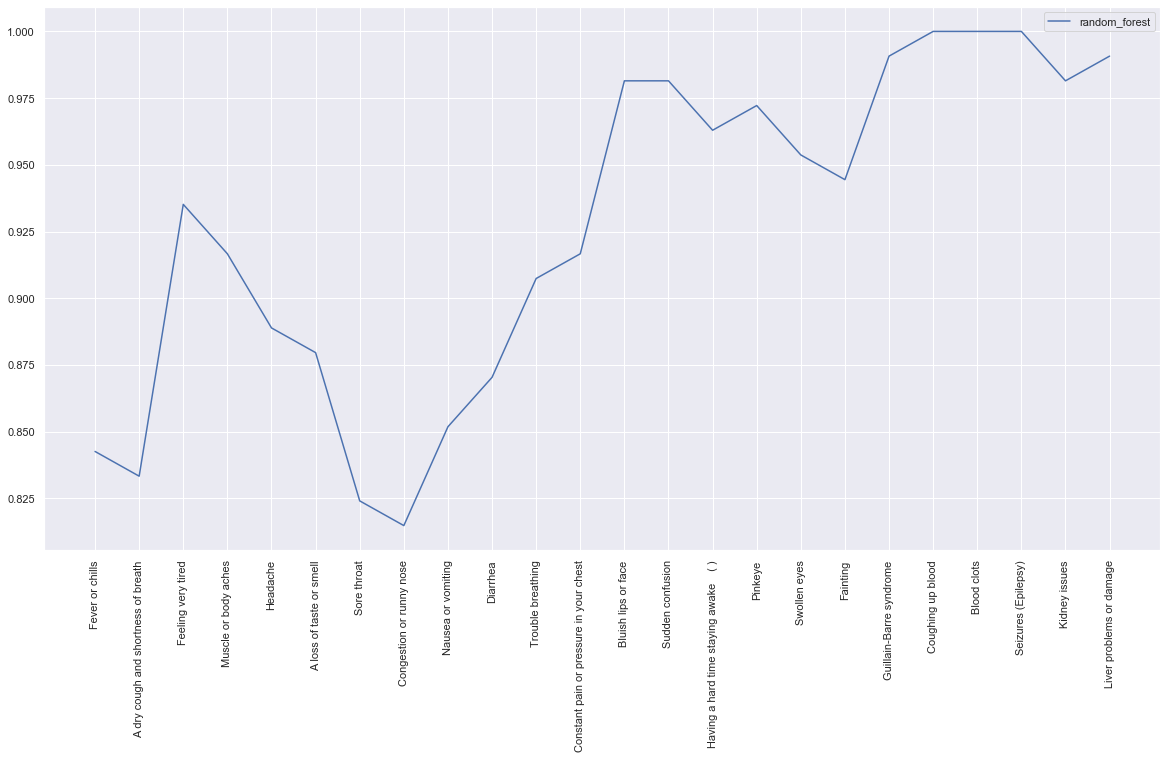

In [63]:
sns.lineplot(x=y_test.columns, y=random_forest)

l=["random_forest"]
plt.legend(l)
t=plt.xticks(rotation=90)

We can use the Random Forest algorithm to find out the features that played an important role while classification of each sypmtom using the 'feature_importances_' attribute of 'RandomForestClassifier'.

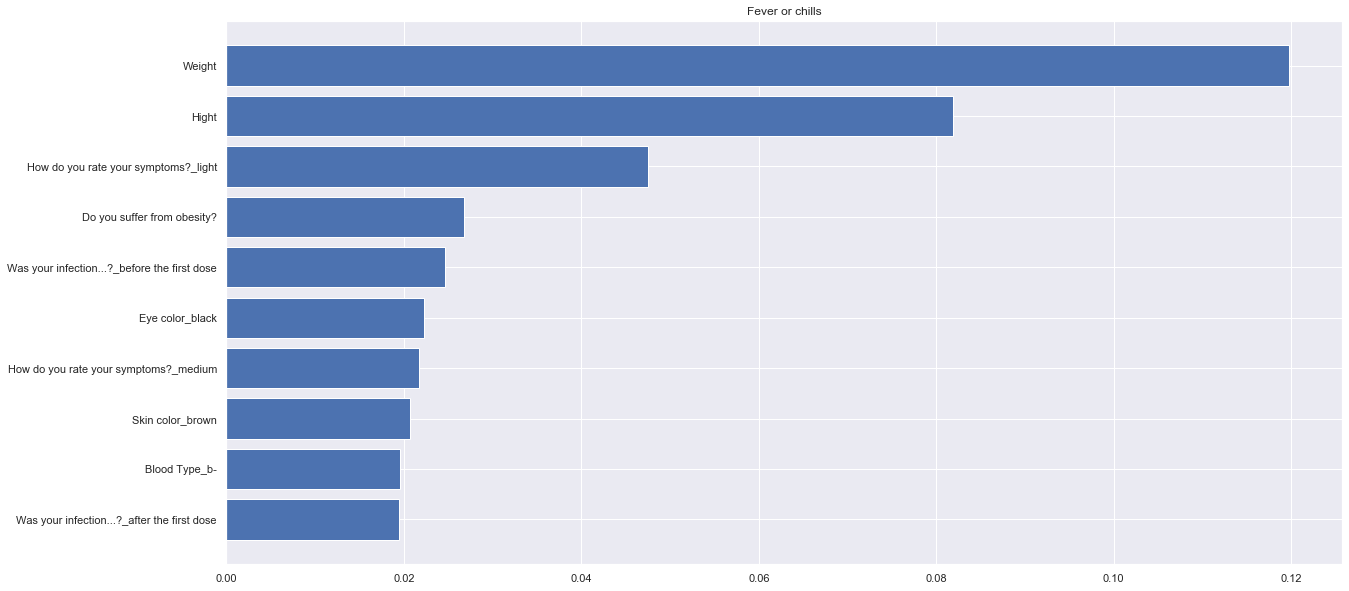

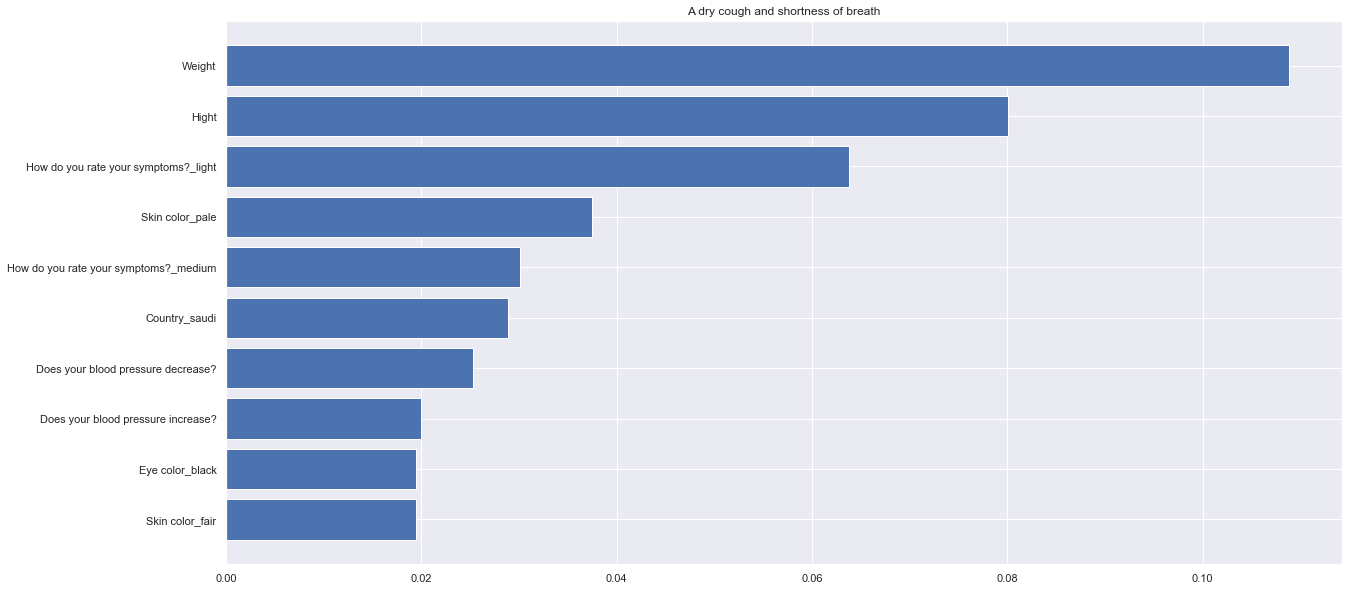

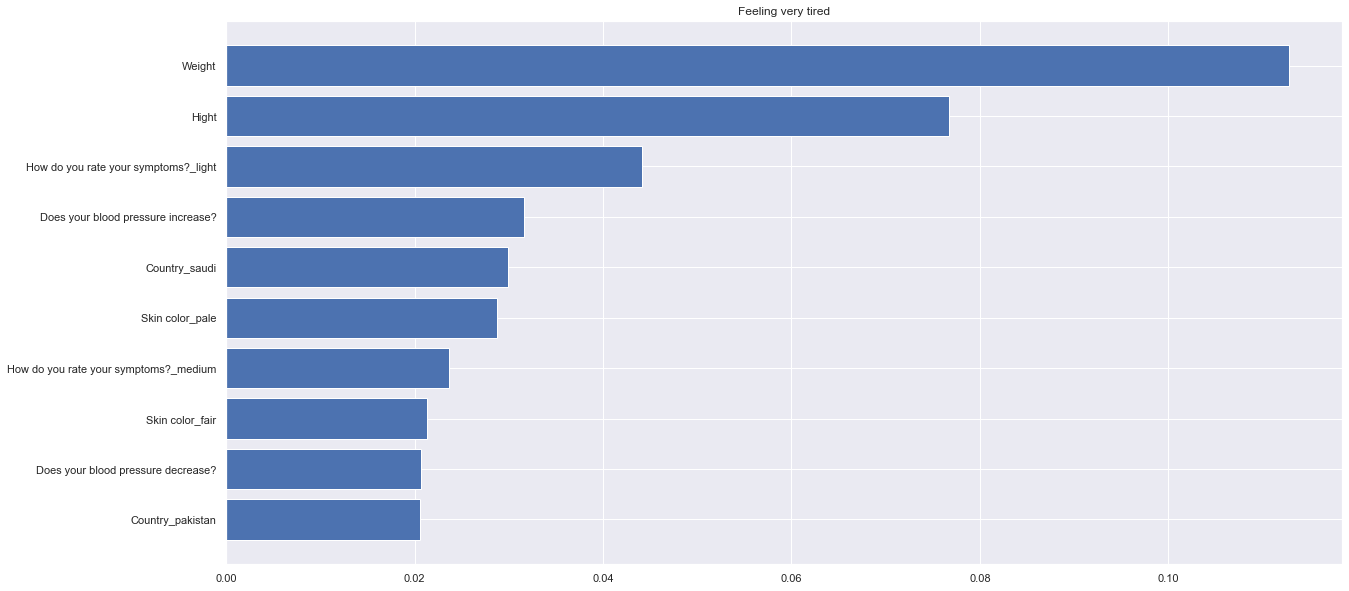

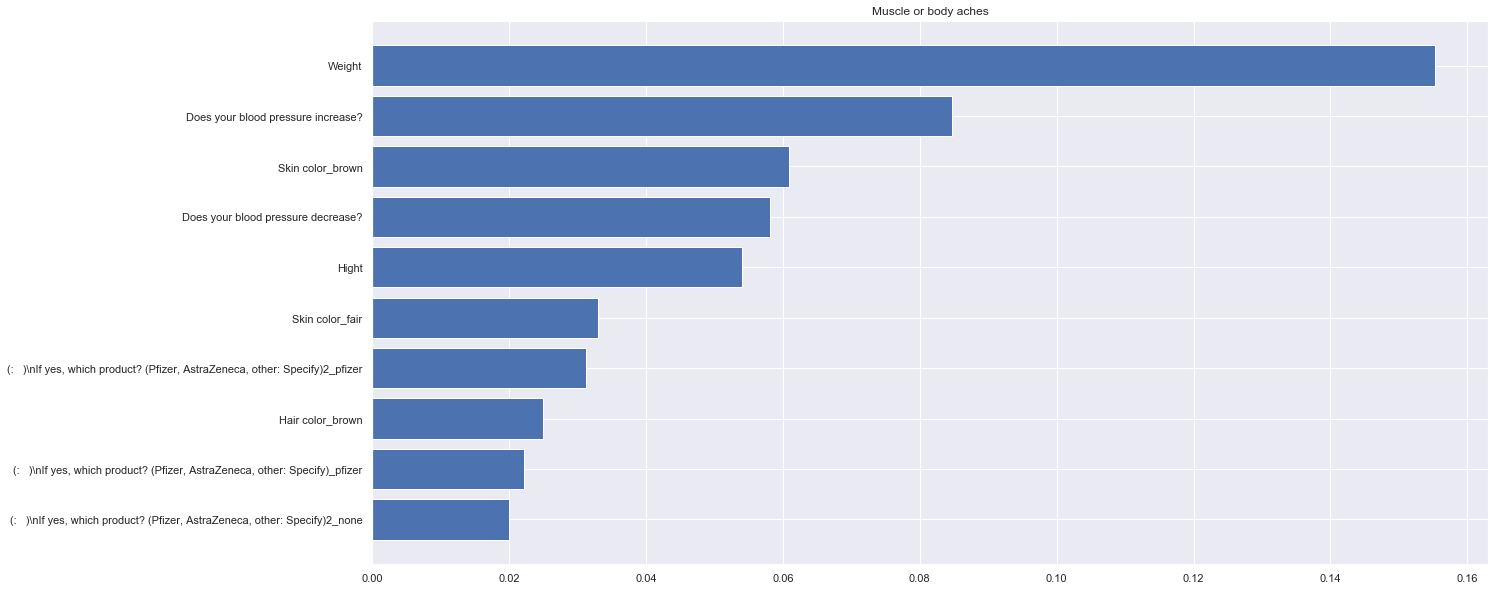

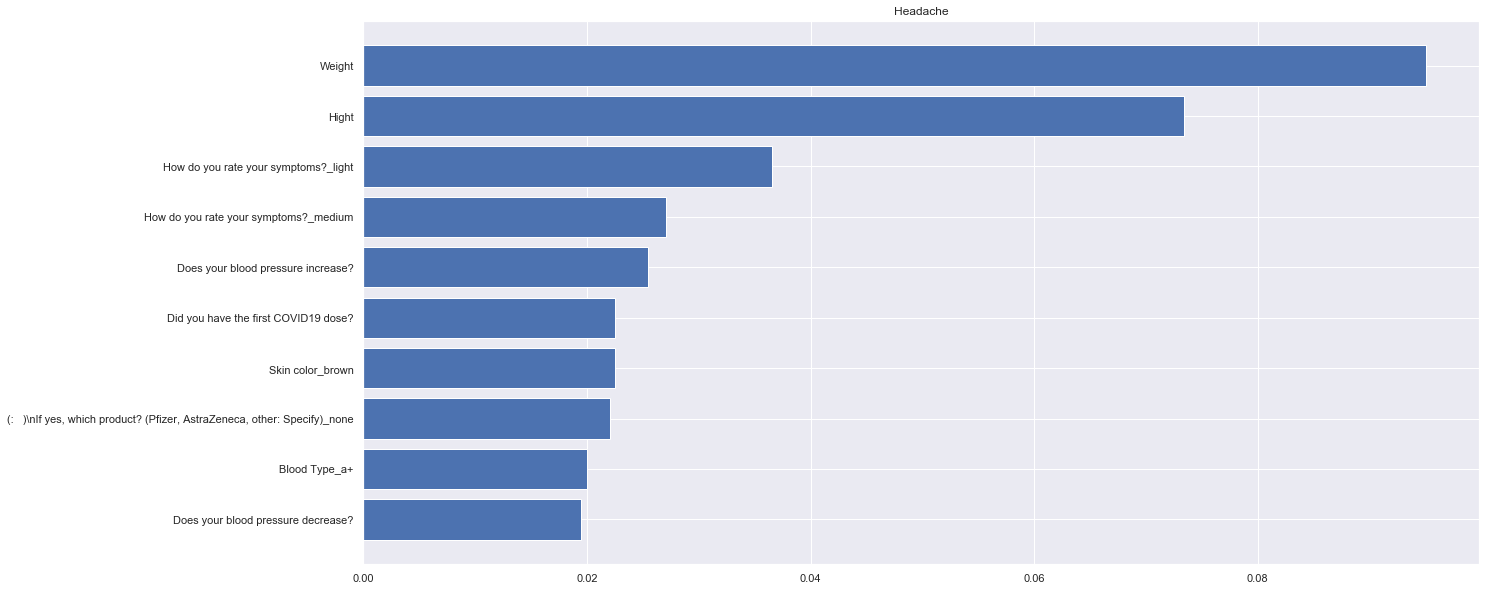

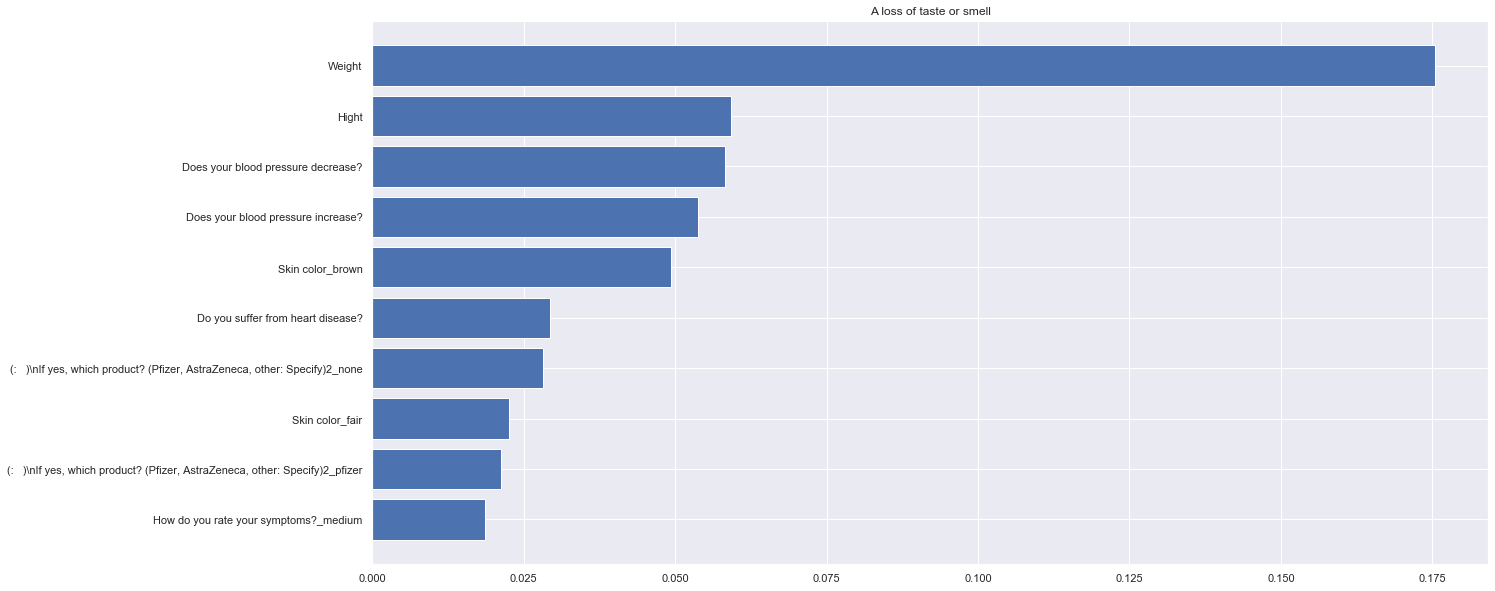

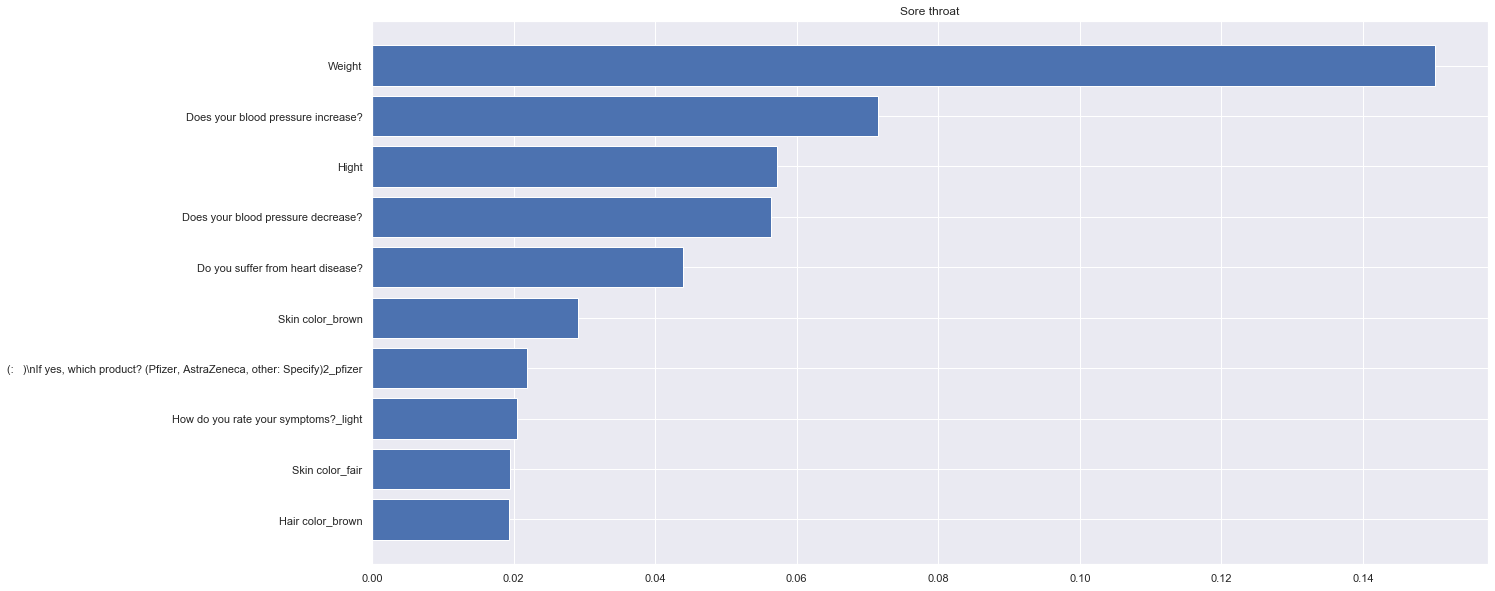

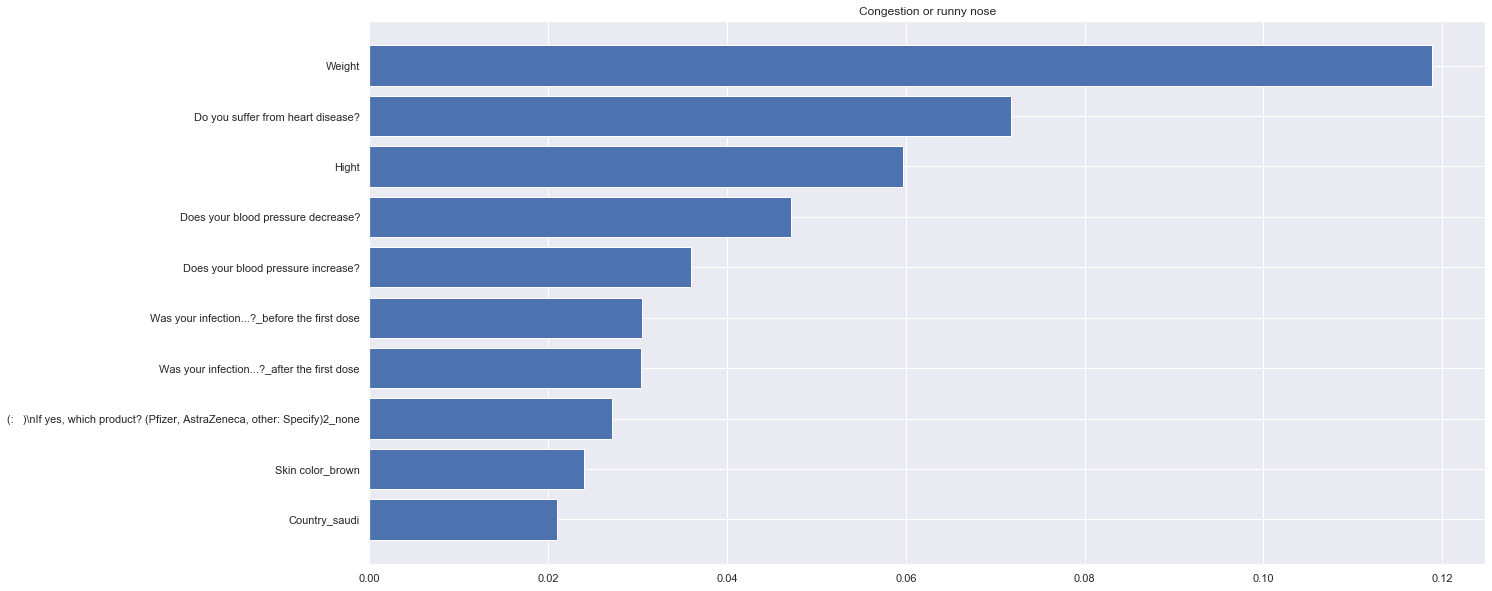

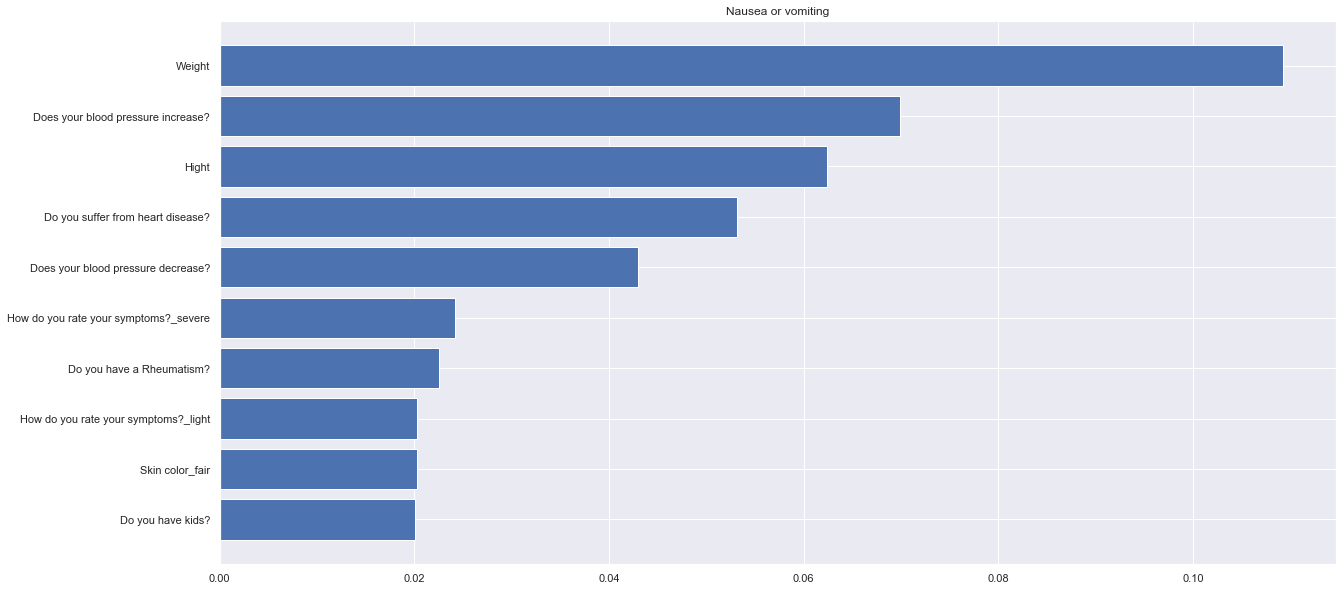

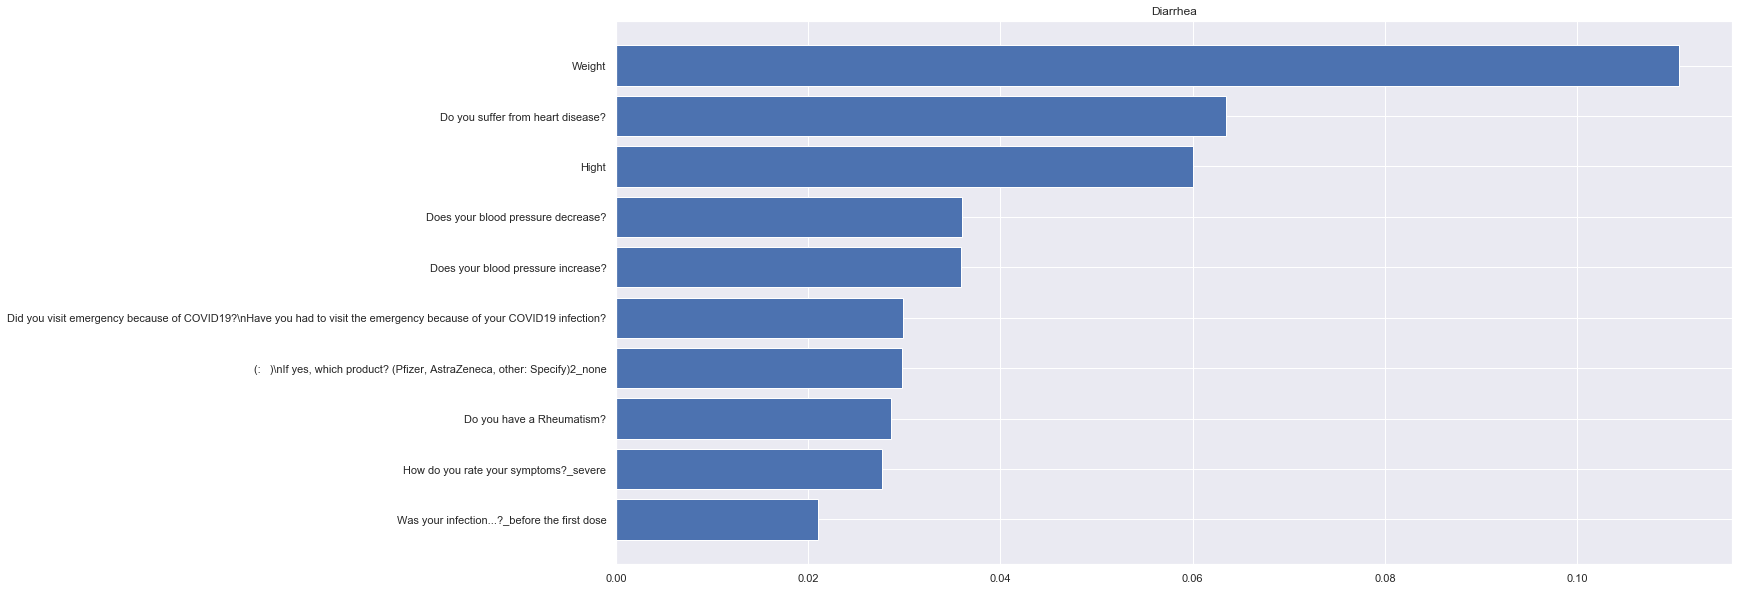

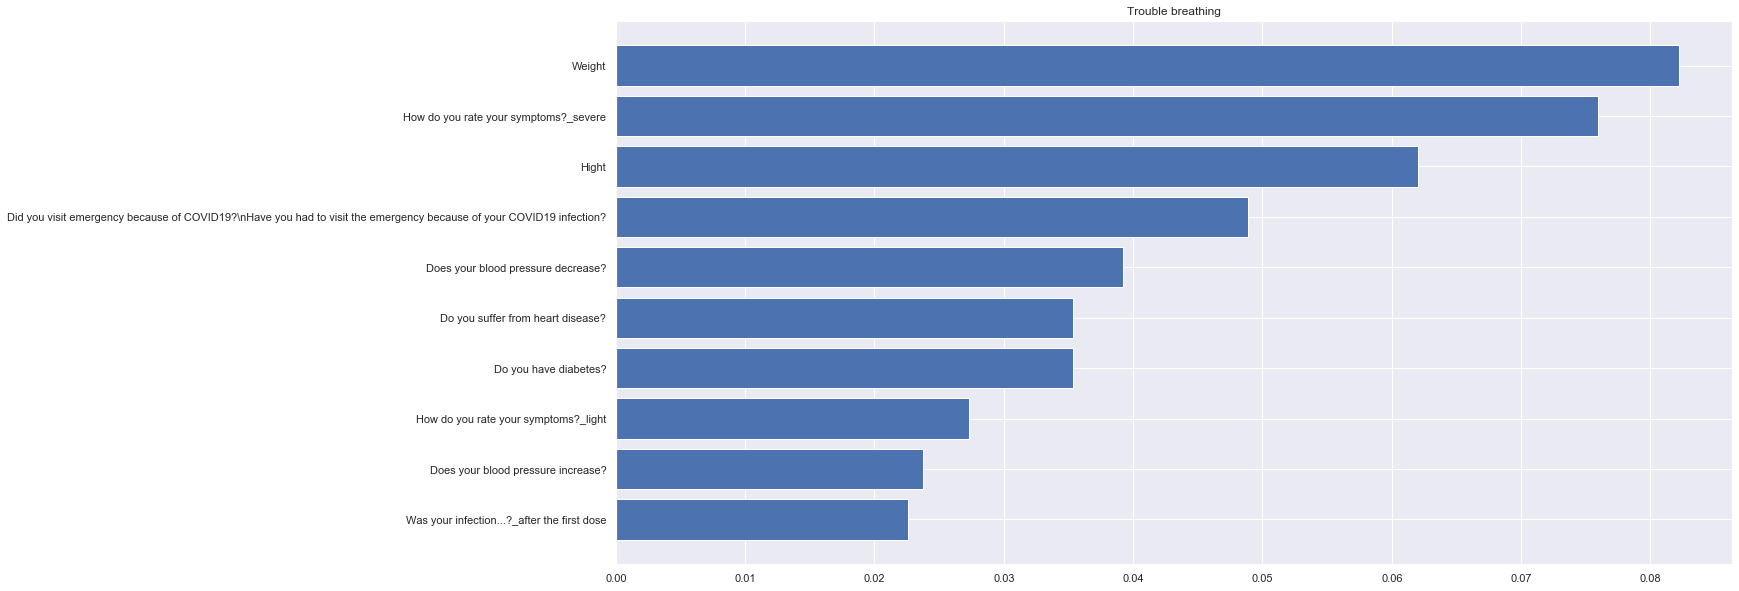

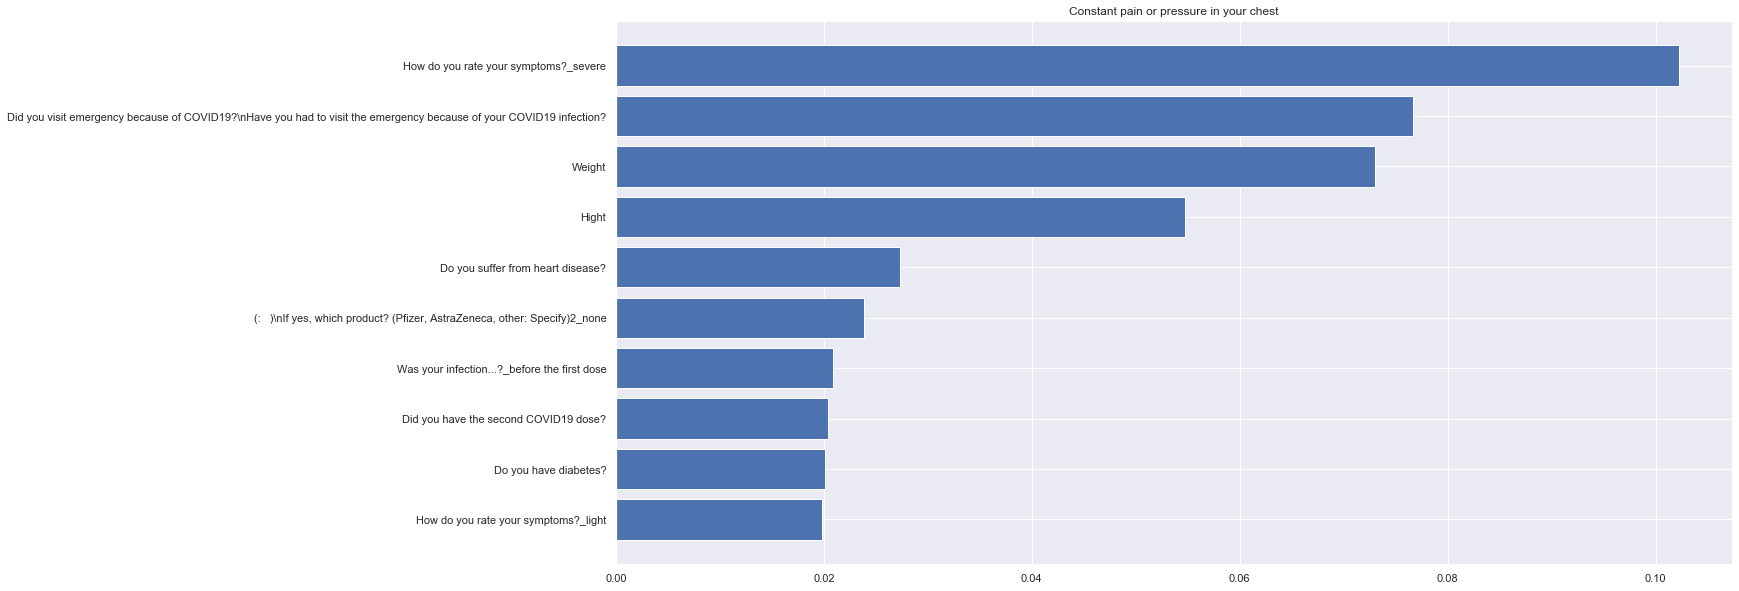

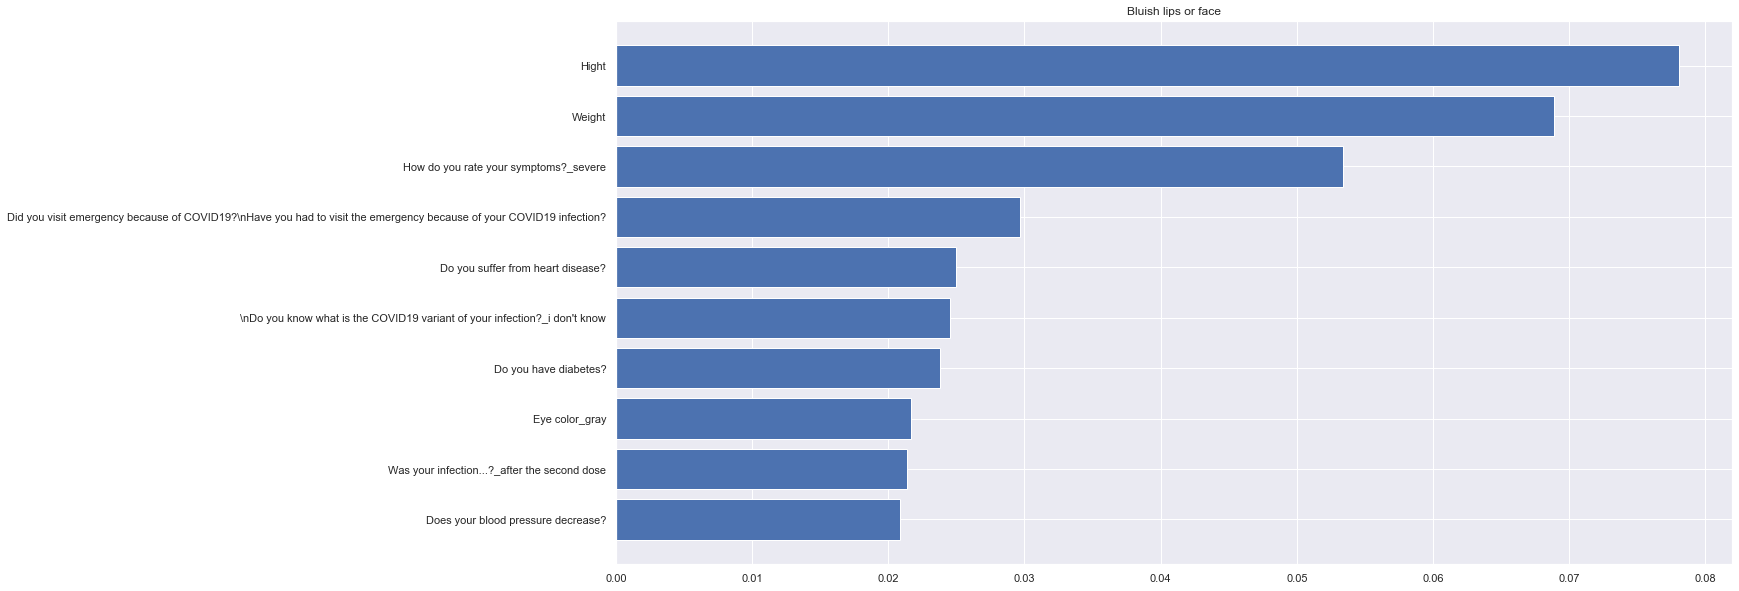

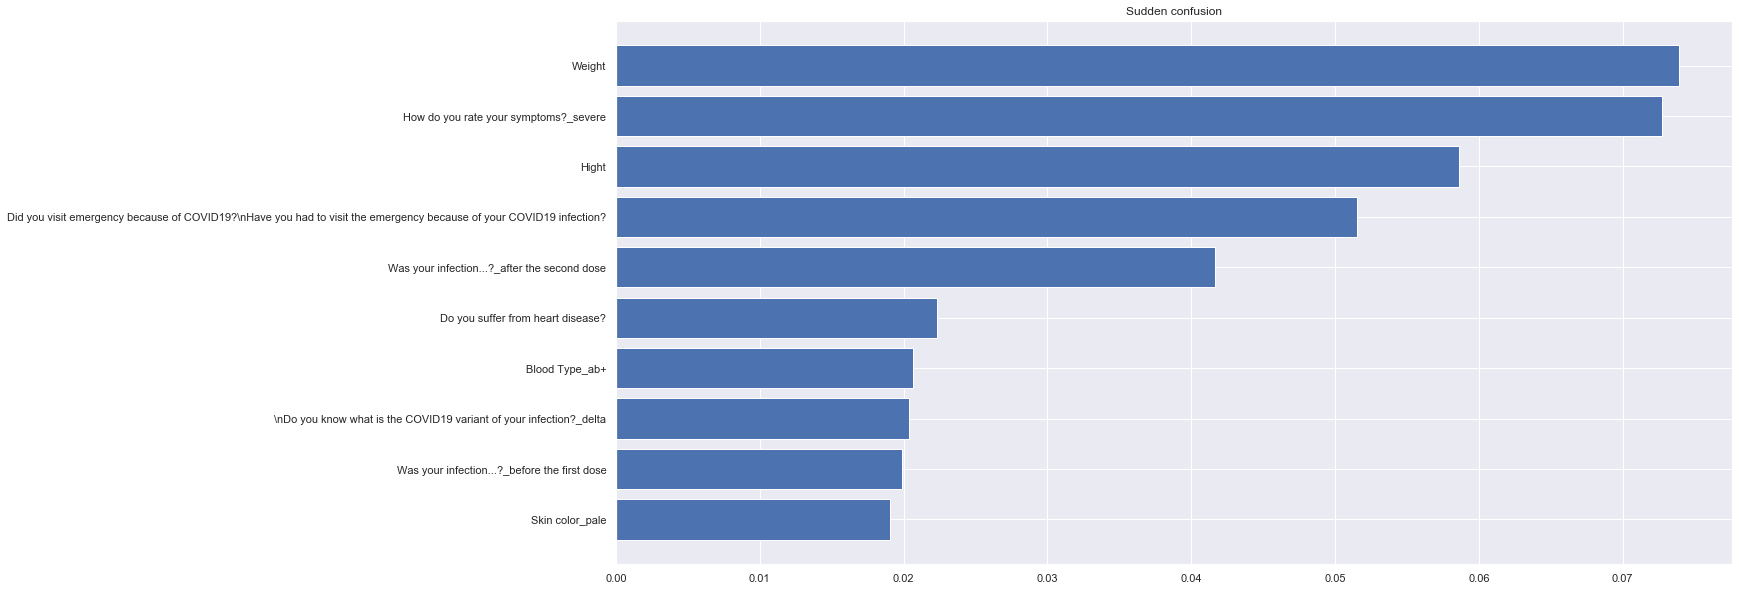

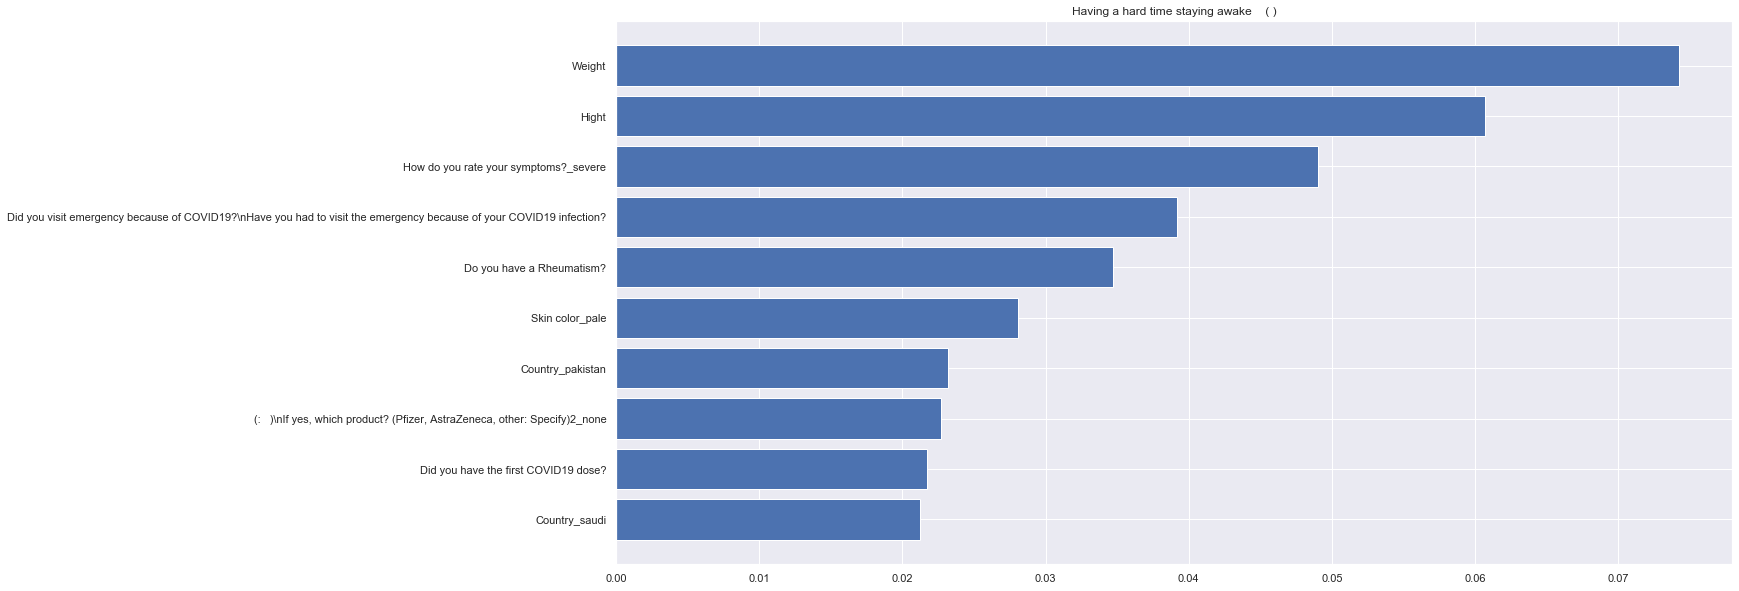

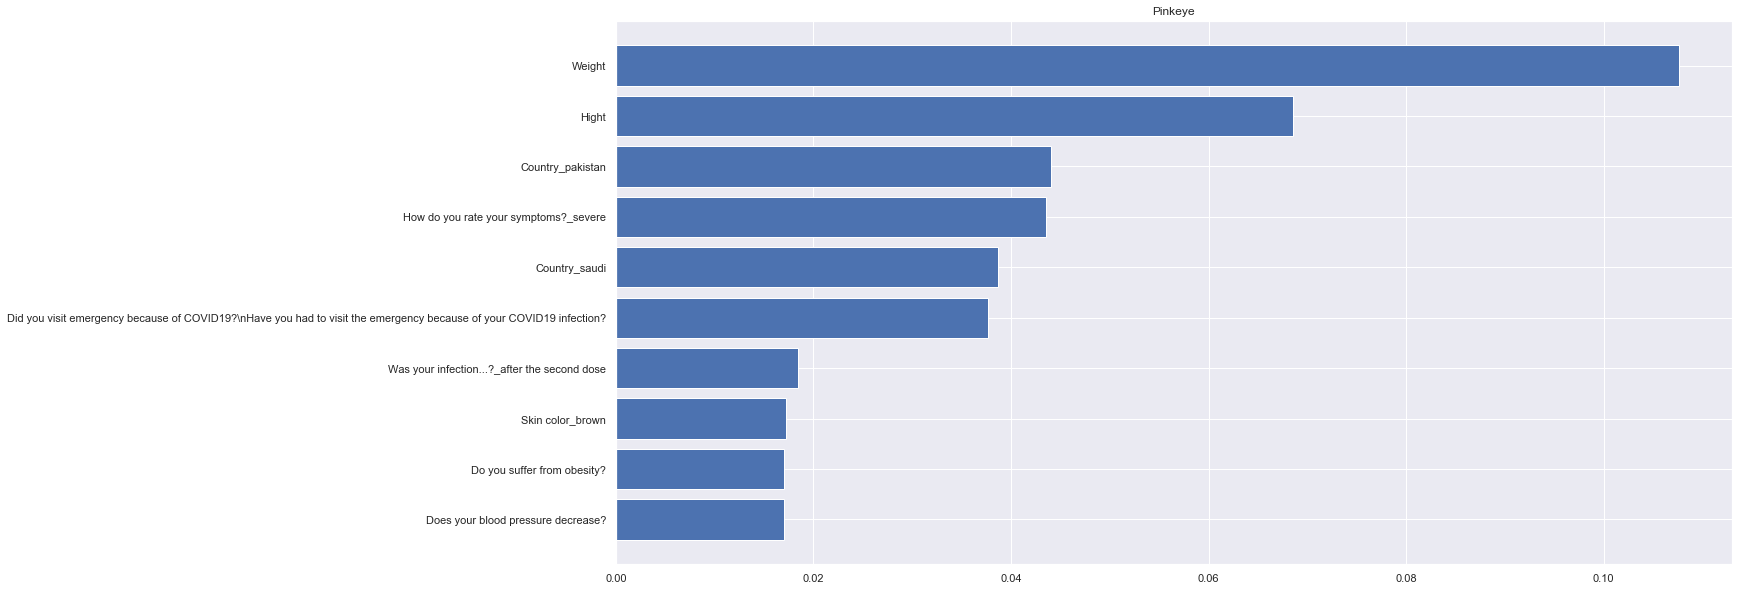

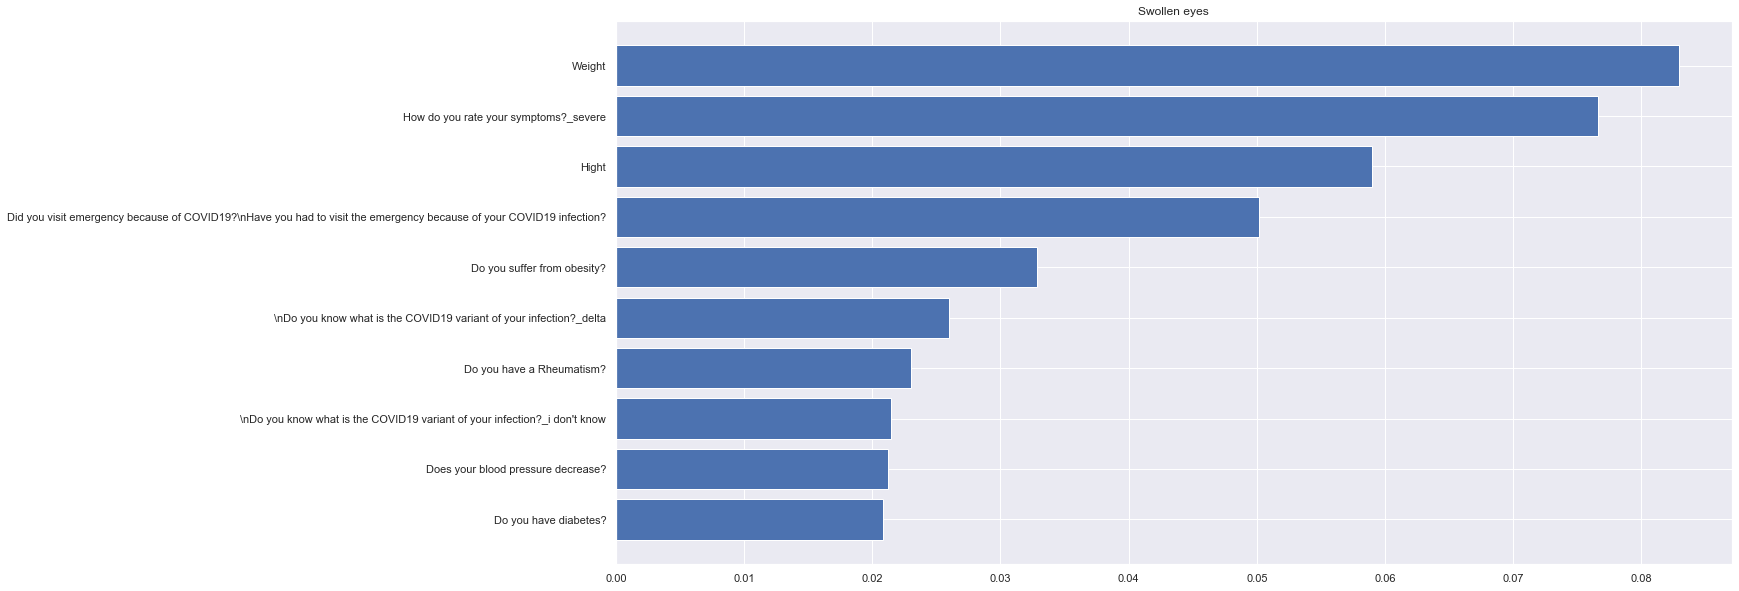

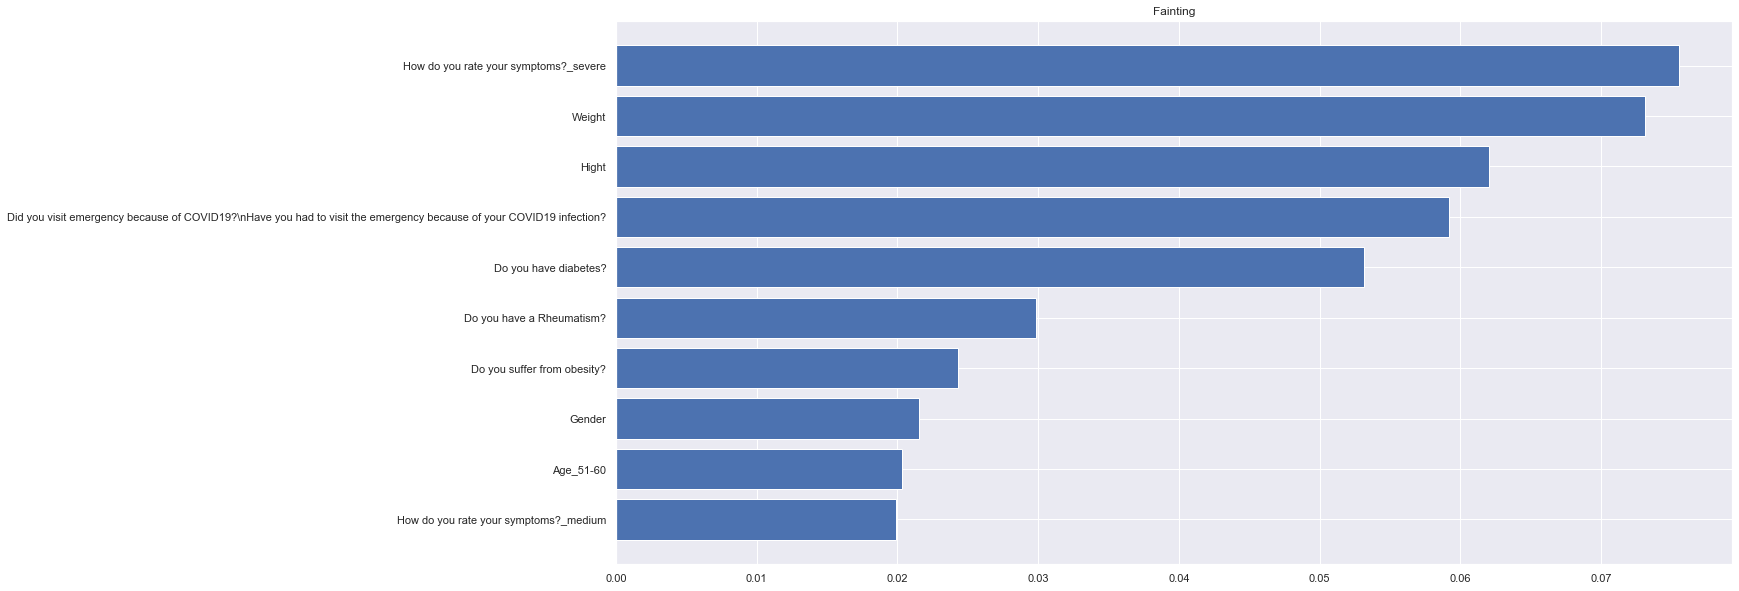

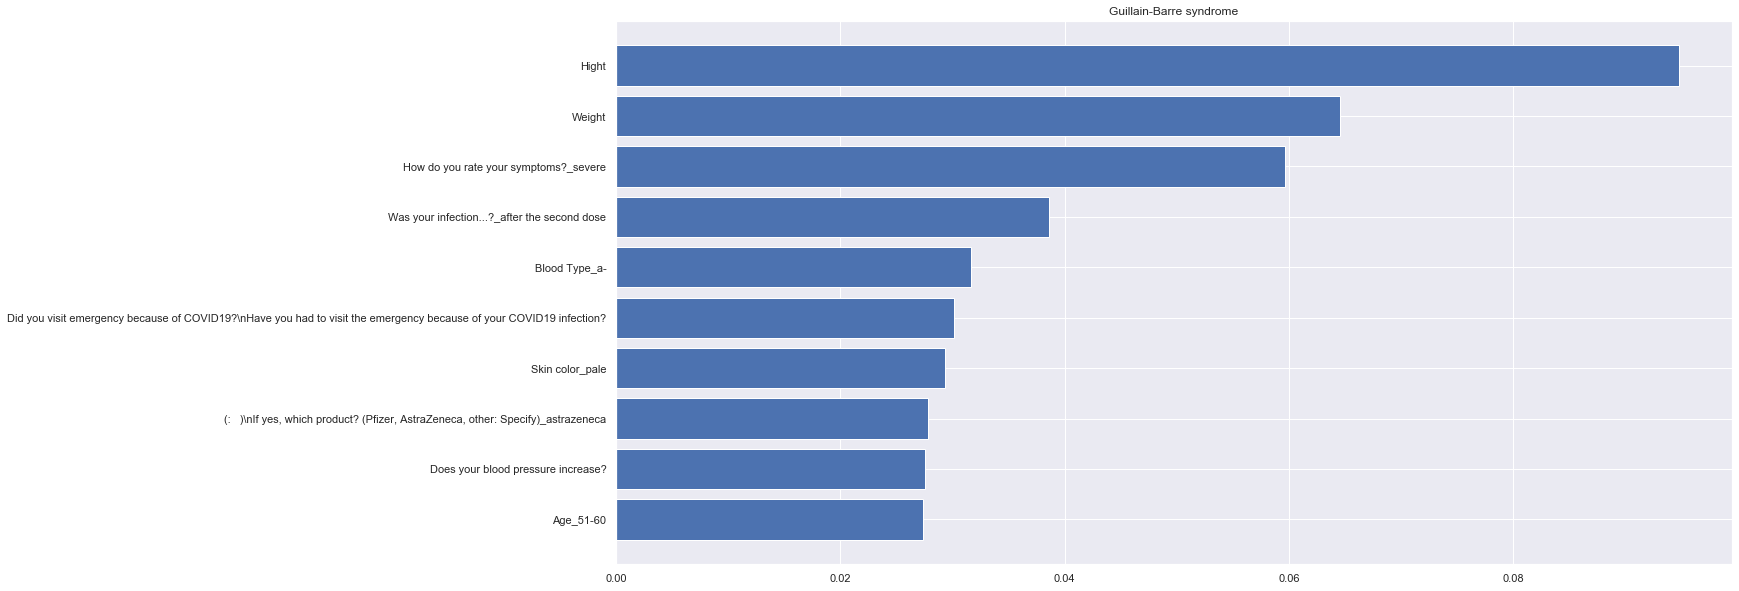

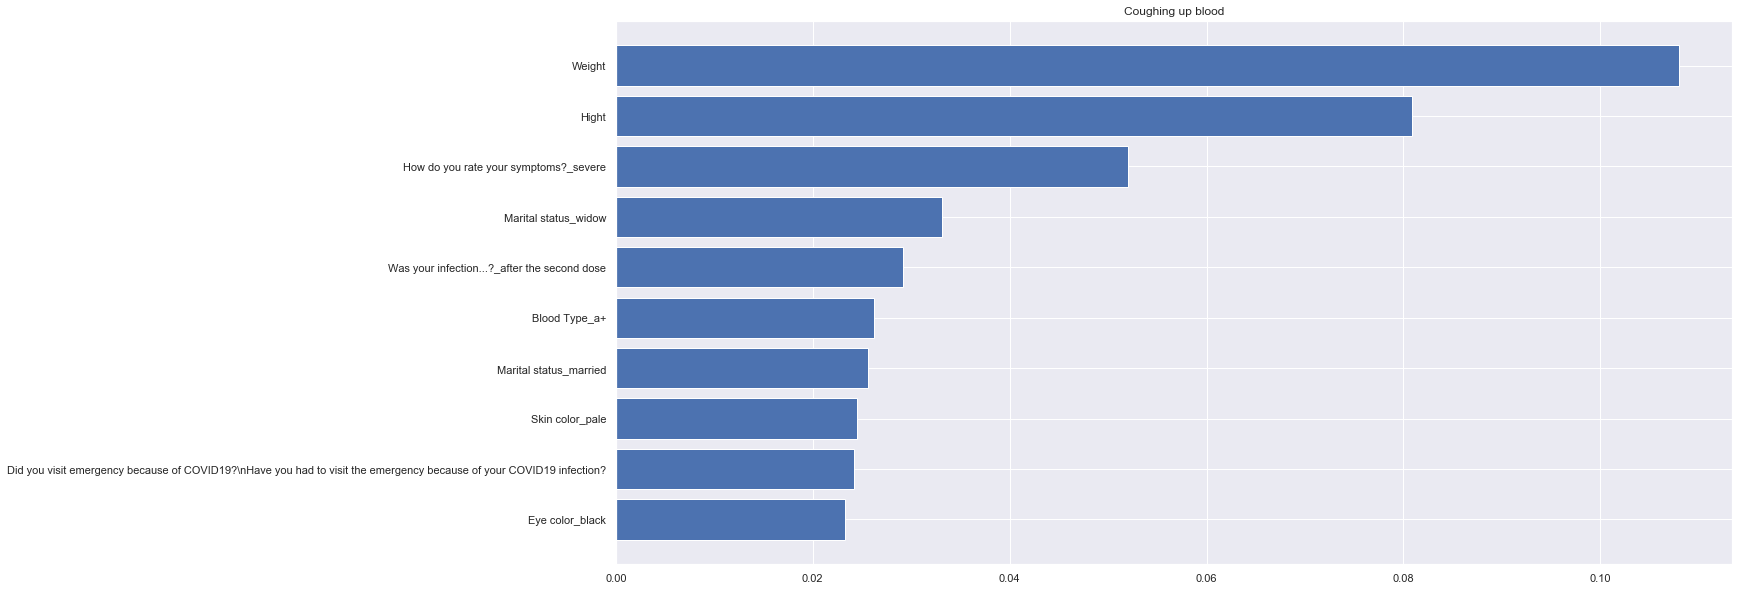

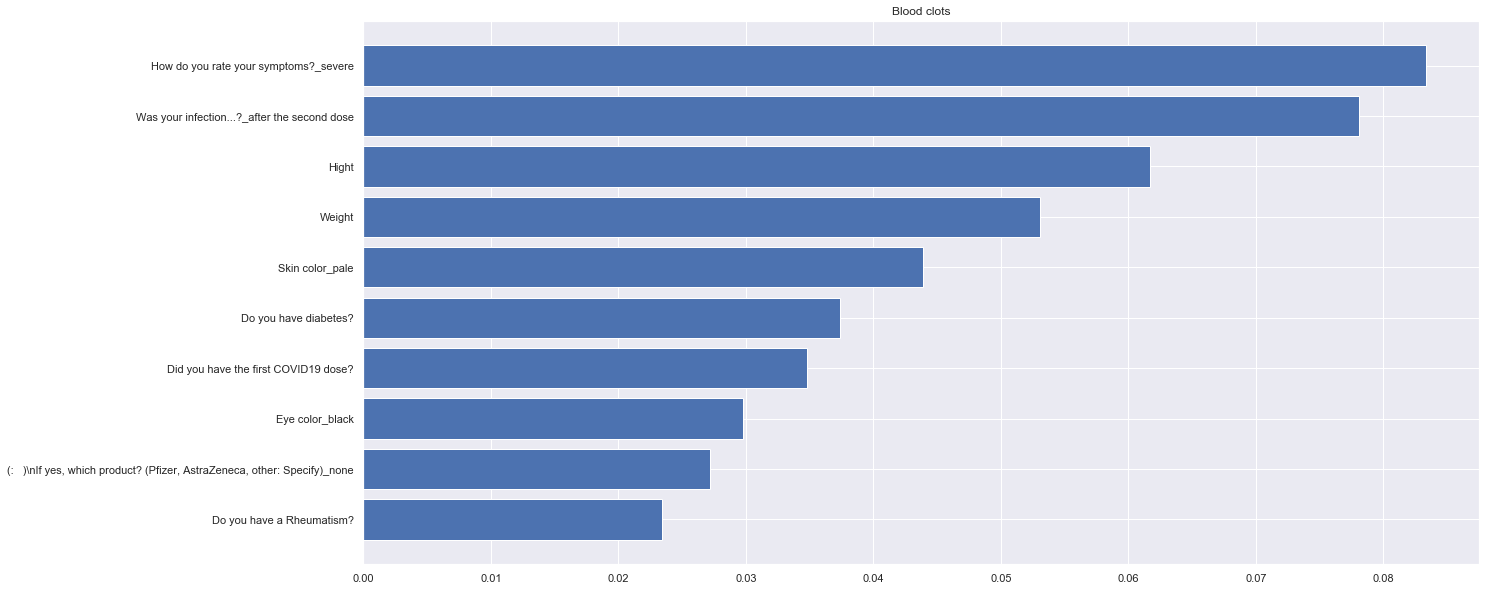

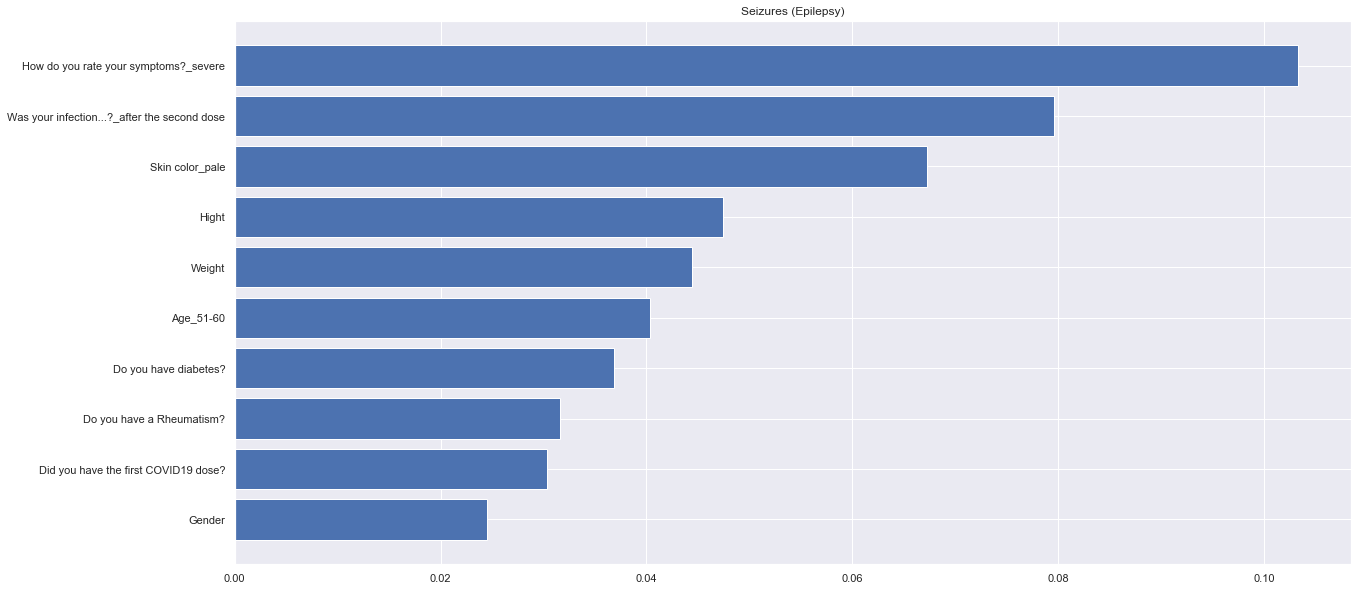

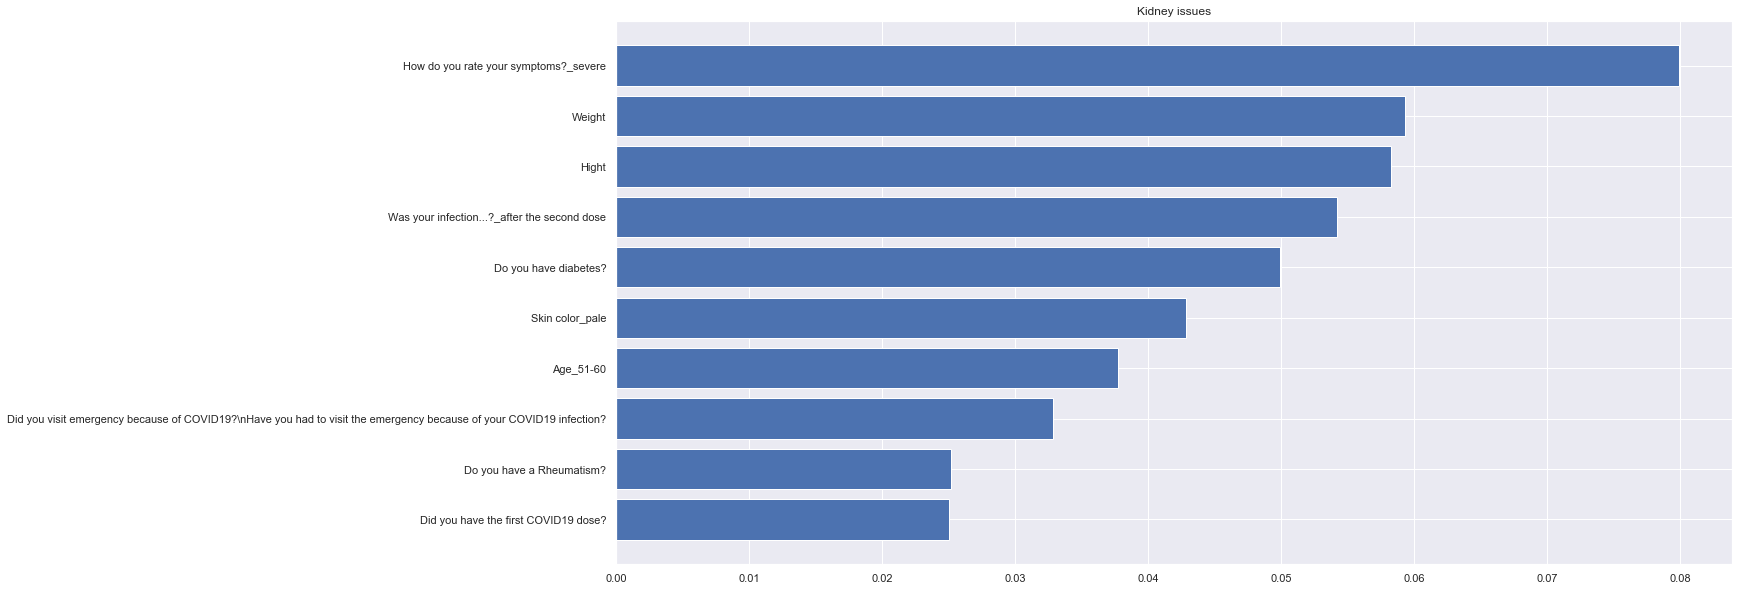

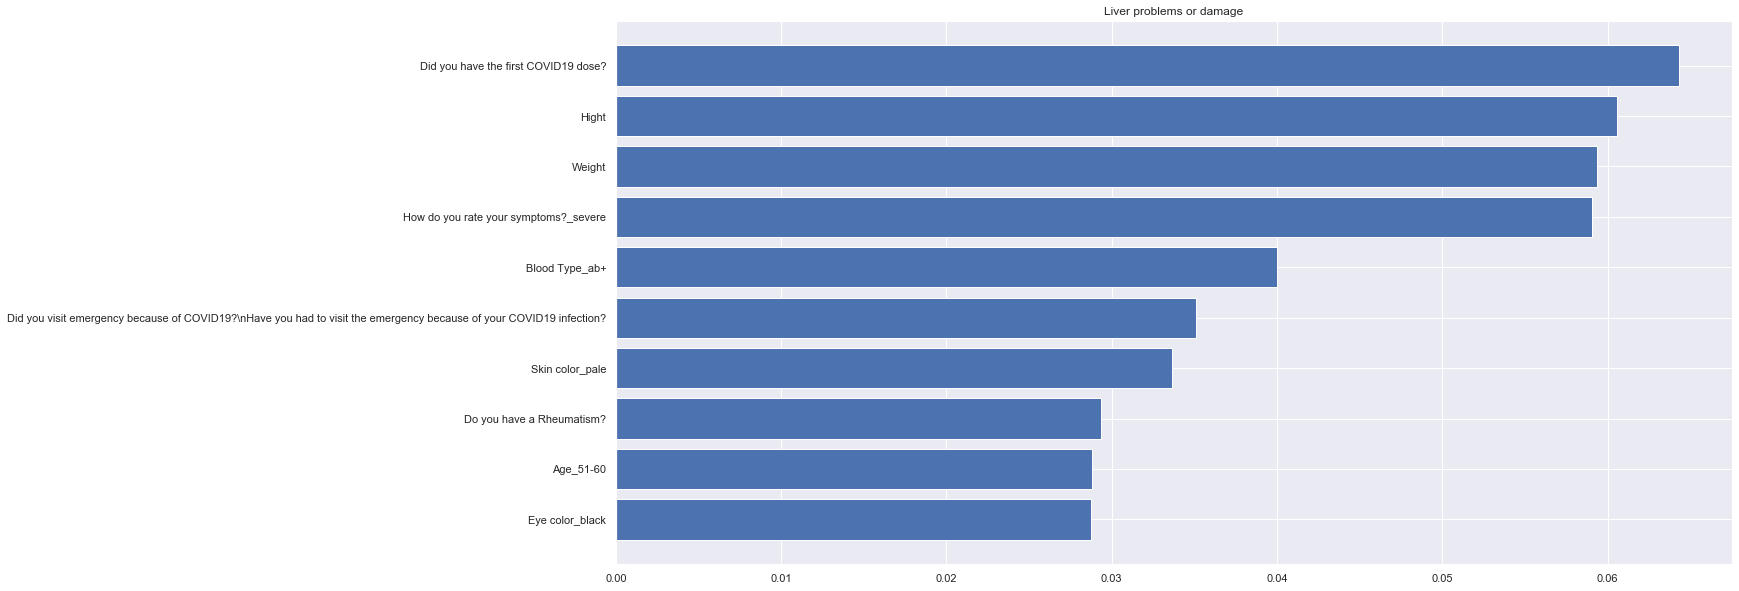

In [64]:
for i in y_train.columns:
    model = RandomForestClassifier(max_depth=10, random_state=0)
    model.fit(x_train, y_train[i])
    importance = model.feature_importances_
    imp = pd.DataFrame({"Col_names":x_train.columns, "Importance":importance}, index=range(len(importance)))
    imp = imp.sort_values("Importance", axis=0, ascending=True)
    plt.figure(i)
    plt.title(i)
    plt.barh(imp["Col_names"][-10:], imp["Importance"][-10:])

The x-axis represents the impurity-based feature importances. The higher the value, the more important the feature. 

From the above barplots following features are recognized as most usefull when predicting symptoms:

1. **Fever or chills**:
    Weight, Hight, Obesity.
2. **A dry cough and shortness of breath:**
    Weight, Hight, Increasing and Decreasing Blood Pressure.
3. **Feeling very tired:**
    Weight, Hight, Increasing and Decreasing Blood Pressure.
4. **Muscle or body aches:**
    Weight, Hight, Increasing and Decreasing Blood Pressure.
5. **Headache:**
    Weight, Hight, 1st Covid Dose, Increasing and Decreasing Blood Pressure.
6. **A loss of taste or smell:**
    Weight, Hight, Heart Diseases, Increasing and Decreasing Blood Pressure.
7. **Sore throat:**
    Weight, Hight, Heart Diseases, Increasing and Decreasing Blood Pressure.
8. **Congestion or runny nose:**
    Weight, Hight, Heart Diseases, Increasing and Decreasing Blood Pressure.
9. **Nausea or vomiting:**
    Weight, Hight, Heart Diseases, kids, rheumatism, Increasing and Decreasing Blood Pressure.
10. **Diarrhea:**
    Weight, Hight, Heart Diseases, rheumatism, Emergency Visit, Increasing and Decreasing Blood Pressure.
11. **Trouble breathing:**
    Weight, Hight, Diabetes, Heart Diseases, Emergency Visit, Increasing and Decreasing blood pressure.
12. **Constant pain or pressure in your chest:**
    Weight, Hight, Diabetes, Heart Diseases, Emergency Visit and 2nd Covid Dose.
13. **Bluish lips or face:**
    Weight, Hight, Diabetes, Heart Diseases, Emergency Visit and Decreasing Blood Pressure.
14. **Sudden confusion:**
    Weight, Hight, Heart Diseases, Emergency Visit and 2nd Covid Dose.
15. **Having a hard time staying awake    ( ):**
    Weight, Hight, Rheumatism, Emergency Visit and 1st Covid Dose.
16. **Pinkeye:**
    Weight, Hight, Obesity, Emergency Visit and Decreasing Blood Pressure.
17. **Swollen eyes:**
    Weight, Hight, Obesity, Rheumatism, Diabetes, Emergency Visit and Decreasing Blood Pressure.
18. **Fainting:**
    Weight, Hight, Obesity, Rheumatism, Diabetes, Gender, Emergency Visit and Decreasing Blood Pressure.
19. **Guillain-Barre syndrome:**
    Weight, Hight, Emergency Visit and Increasing Blood Pressure.
20. **Coughing up blood:**
    Weight, Hight and Emergency Visit.
21. **Blood clots:**
    Weight, Hight, Rheumatism, Diabetes and 1st Covid Dose.
22. **Seizures (Epilepsy):**
    Weight, Hight, Rheumatism, Diabetes, Gender and 1st Covid Dose.
23. **Kidney issues:**
    Weight, Hight, Rheumatism, Diabetes, Emergency Visit and 1st Covid Dose.
24. **Liver problems or damage:**
    Weight, Hight, Rheumatism, Emergency Visit and 1st Covid Dose.

Weight and Hight are two of the top ten most important features for classification of every symptom. 

In [65]:
for i in y_train.columns:
    model = RandomForestClassifier(max_depth=10, random_state=0)
    model.fit(x_train, y_train[i])
    importance = model.feature_importances_
    imp = pd.DataFrame({"Col_names":x_train.columns, "Importance":importance}, index=range(len(importance)))
    imp = imp.sort_values("Importance", axis=0, ascending=True)
    print(i,":\n\t\t\t\t" , str(imp["Col_names"].iloc[-1]))

Fever or chills :
				 Weight
A dry cough and shortness of breath :
				 Weight
Feeling very tired :
				 Weight
Muscle or body aches :
				 Weight
Headache :
				 Weight
A loss of taste or smell :
				 Weight
Sore throat :
				 Weight
Congestion or runny nose :
				 Weight
Nausea or vomiting :
				 Weight
Diarrhea :
				 Weight
Trouble breathing :
				 Weight
Constant pain or pressure in your chest :
				 How do you rate your symptoms?_severe
Bluish lips or face :
				 Hight
Sudden confusion :
				 Weight
Having a hard time staying awake    ( ) :
				 Weight
Pinkeye :
				 Weight
Swollen eyes :
				 Weight
Fainting :
				 How do you rate your symptoms?_severe
Guillain-Barre syndrome :
				 Hight
Coughing up blood :
				 Weight
Blood clots :
				 How do you rate your symptoms?_severe
Seizures (Epilepsy) :
				 How do you rate your symptoms?_severe
Kidney issues :
				 How do you rate your symptoms?_severe
Liver problems or damage :
				 Did you have the first COVID19 dose?


This shows that Weight(16) is the most imortant feature for most of the symptoms, followed by Severe Symptoms(5), Hight(2) and 1st Covid Dose(1).